In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os
from data import Dataset
import csv as csv
from skimage.filters import gaussian
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.stats import wilcoxon
import tqdm

def corrcoef(x, y):
    """Return Pearson product-moment correlations coefficients.

    This is a wrapper around `np.corrcoef` to avoid:
        `RuntimeWarning: invalid value encountered in true_divide`.
    """

    assert len(x) > 0, len(x)
    assert len(y) > 0, len(y)
    assert len(x) == len(y), (len(x), len(y))

    is_x_deterministic = np.all(x == x[0])  # i.e. array filled with a unique value
    is_y_deterministic = np.all(y == y[0])  # i.e. array filled with a unique value
    if is_x_deterministic and is_y_deterministic:
        r = 1.0
    elif is_x_deterministic or is_y_deterministic:
        r = 0.0
    else:
        r = np.corrcoef(x, y)[0, 1]

    return r

# Figure 1C

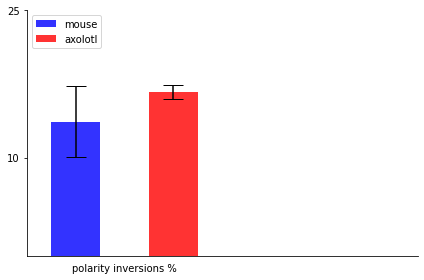

In [3]:
#inverting cells percentages (invertions detected with the Berens)

mouse_invs_percentages=np.array([17/59, 9/92, 8/83, 4/74, 19/85, 3/50])
salamander_invs_percentages=np.array([4/25, 4/23])

mouse_invs_mean_perc=mouse_invs_percentages.mean()
salamander_invs_mean_perc=salamander_invs_percentages.mean()

mouse_invs_mean_error=mouse_invs_percentages.std()/np.sqrt(mouse_invs_percentages.size)
#salamander_invs_mean_error=salamander_invs_percentages.std()/np.sqrt(salamander_invs_percentages.size)
salamander_invs_mean_error=np.diff(salamander_invs_percentages)[0]/2

# print(mouse_invs_mean_perc,mouse_invs_mean_error)
# print(salamander_invs_mean_perc,salamander_invs_mean_error)

labels = ['polarity inversions %']
mouse = [mouse_invs_mean_perc]
salamander = [salamander_invs_mean_perc]
y_err_m=np.array([mouse_invs_mean_error])
y_err_s=np.array([salamander_invs_mean_error])

x = np.arange(len(labels)+1)*.5 # the label locations

width = 0.1  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(0.2 - 0.1, mouse, width, alpha=opacity, label='mouse', color='blue',yerr=y_err_m,capsize=10)
rects2 = ax.bar(0.2 + 0.1, salamander, width, alpha=opacity,label='axolotl',color='red', yerr=y_err_s, capsize=10)

# hbars = ax.barh(x, performance, xerr=error, align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks([0,0.2,0.8])
ax.set_xticklabels(['',labels[0],''])
#plt.xlabel(labels[0])
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

yticks=np.array([.1,.25])
ax.set_yticks(yticks)
ax.set_yticklabels((yticks*100).astype(int))
ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_1C.pdf',format='pdf')
plt.show()
#plt.save('/home/samuele/Data_analysis/Figures/Panel_1C.pdf', )

In [59]:
mouse_invs_mean_perc,mouse_invs_mean_error, salamander_invs_mean_perc, salamander_invs_mean_error

(0.13665511469404923,
 0.0358708147229992,
 0.16695652173913045,
 0.006956521739130431)

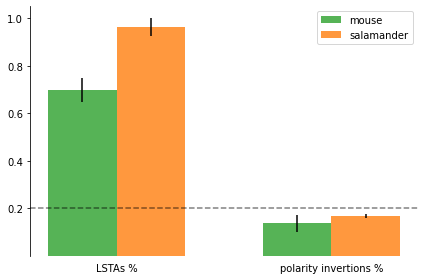

In [59]:
# mouse_lstas_percentages=np.array([59/94, 92/114, 83/100, 74/104, 85/115, 50/107])
# salamander_lstas_percentages=np.array([25/27, 23/23])

# mouse_lstas_mean_perc=mouse_lstas_percentages.mean()
# salamander_lstas_mean_perc=salamander_lstas_percentages.mean()

# mouse_lstas_mean_error=mouse_lstas_percentages.std()/np.sqrt(mouse_lstas_percentages.size)
# #salamander_lstas_mean_error=salamander_lstas_percentages.std()/np.sqrt(salamander_lstas_percentages.size)
# salamander_lstas_mean_error=np.diff(salamander_lstas_percentages)[0]/2

# #print(mouse_lstas_mean_perc,mouse_lstas_mean_error)
# #print(salamander_lstas_mean_perc,salamander_lstas_mean_error)

# mouse_invs_percentages=np.array([17/59, 9/92, 8/83, 4/74, 19/85, 3/50])
# salamander_invs_percentages=np.array([4/25, 4/23])

# mouse_invs_mean_perc=mouse_invs_percentages.mean()
# salamander_invs_mean_perc=salamander_invs_percentages.mean()

# mouse_invs_mean_error=mouse_invs_percentages.std()/np.sqrt(mouse_invs_percentages.size)
# #salamander_invs_mean_error=salamander_invs_percentages.std()/np.sqrt(salamander_invs_percentages.size)
# salamander_invs_mean_error=np.diff(salamander_invs_percentages)[0]/2

# # print(mouse_invs_mean_perc,mouse_invs_mean_error)
# # print(salamander_invs_mean_perc,salamander_invs_mean_error)



# labels = ['LSTAs %', 'polarity inversions %']
# mouse = [mouse_lstas_mean_perc, mouse_invs_mean_perc]
# salamander = [salamander_lstas_mean_perc, salamander_invs_mean_perc]
# y_err_m=np.array([mouse_lstas_mean_error,mouse_invs_mean_error])
# y_err_s=np.array([salamander_lstas_mean_error,salamander_invs_mean_error])

# x = np.arange(len(labels))*0.25  # the label locations

# width = 0.08  # the width of the bars

# fig, ax = plt.subplots()

# opacity = 0.8

# rects1 = ax.bar(x - width/2, mouse, width, alpha=opacity, label='mouse', color='C2',yerr=y_err_m)
# rects2 = ax.bar(x + width/2, salamander, width, alpha=opacity,label='salamander',color='C1', yerr=y_err_s)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# yticks=np.array([.2,.4,.6,.8,1.0])
# ax.set_yticks(yticks)
# ax.set_yticklabels(yticks)
# ax.legend()

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# #ax.spines['left'].set_visible(False)

# #ax.bar_label(rects1, padding=3)
# #ax.bar_label(rects2, padding=3)
# plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

# fig.tight_layout()
# fig.savefig('/home/samuele/Data_analysis/Figures/Panel_1C.pdf',format='pdf')
# plt.show()
# #plt.save('/home/samuele/Data_analysis/Figures/Panel_1C.pdf', )

# Figure 1 D

In [99]:
#displacement of the LSTAs inside the RF

mouse_exps=[11,12,13,14,17,19]
salam_exps=[101,102]

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

tot_shifts_mouse=[]
for exp in mouse_exps:
    
    if exp<14:berens_LSTAS=np.load('/media/samuele/Samuele_01/Exp_{0}/analysis/Best_denoised_LSTAS_berens_exp{0}_s1200.npy'.format(exp))
    else: berens_LSTAS=np.load('/media/samuele/Samuele_01/Exp_{0}/analysis/Best_denoised_LSTAS_berens_exp{0}.npy'.format(exp))
    exp_LSTAs_pol_ber=np.load('/media/samuele/Samuele_01/Exp_{0}/analysis/exp_LSTAS_labels_berens_exp{0}.npy'.format(exp),allow_pickle=True)
    
    shifts=[]
    for i in range(berens_LSTAS.shape[0]):
        if abs(exp_LSTAs_pol_ber[i,1]).sum()==0 or abs(exp_LSTAs_pol_ber[i,1]).sum()==1: continue 
        #these cells have only one detected Lsta or none and so they are not useful to our analysis
        else:
            selected_LSTAS=np.delete(berens_LSTAS[i],np.where(exp_LSTAs_pol_ber[i,1]==0.)[0], axis=0)
            #redenoised_lstas=np.zeros(selected_LSTAS.shape)
            redenoised_lstas=[]
            for idx,lsta in enumerate(selected_LSTAS):
                if abs(lsta.min())> abs(lsta.max()): p0=[lsta.argmin()%108, int(lsta.argmin()/108),2,2, 0,-1]
                if abs(lsta.max())> abs(lsta.min()): p0=[lsta.argmax()%108, int(lsta.argmax()/108),2,2, 0,1]
                try:
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), lsta.ravel(), p0=p0)
    #                 redenoised_lstas[idx]=gaussian_filt_1((x,y), *best_vals).reshape(108,108)
                    redenoised_lstas.append(gaussian_filt_1((x,y), *best_vals).reshape(108,108))
                except: continue     
            redenoised_lstas=np.array(redenoised_lstas)
            nb_remaining_images=redenoised_lstas.shape[0]
            for j, exp_lsta in enumerate(redenoised_lstas):
                if j==(nb_remaining_images-1):continue
                else:
                    for t in range(j+1,nb_remaining_images):
                        shifts.append(abs(np.dot((exp_lsta/np.linalg.norm(exp_lsta)).ravel(), (redenoised_lstas[t]/np.linalg.norm(redenoised_lstas[t])).ravel())))     
                        #print(shifts)
    tot_shifts_mouse+=shifts

tot_shifts_salam=[]
for exp in salam_exps:
    
    berens_LSTAS=np.load('/media/samuele/Samuele_01/Salamander{0}/Best_denoised_LSTAS_berens_exp{1}.npy'.format(exp-100,exp))
    exp_LSTAs_pol_ber=np.load('/media/samuele/Samuele_01/Salamander{0}/exp_LSTAS_labels_berens_exp{1}.npy'.format(exp-100,exp),allow_pickle=True)
    
    shifts=[]
    for i in range(berens_LSTAS.shape[0]):
        if abs(exp_LSTAs_pol_ber[i,1]).sum()==0 or abs(exp_LSTAs_pol_ber[i,1]).sum()==1: continue 
        #these cells have only one detected Lsta or none and so they are not useful to our analysis
        else:
            selected_LSTAS=np.delete(berens_LSTAS[i],np.where(exp_LSTAs_pol_ber[i,1]==0.)[0], axis=0)
            #redenoised_lstas=np.zeros(selected_LSTAS.shape)
            redenoised_lstas=[]
            for idx,lsta in enumerate(selected_LSTAS):
                if abs(lsta.min())> abs(lsta.max()): p0=[lsta.argmin()%108, int(lsta.argmin()/108),2,2, 0,-1]
                if abs(lsta.max())> abs(lsta.min()): p0=[lsta.argmax()%108, int(lsta.argmax()/108),2,2, 0,1]
                try:
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), lsta.ravel(), p0=p0)
    #                 redenoised_lstas[idx]=gaussian_filt_1((x,y), *best_vals).reshape(108,108)
                    redenoised_lstas.append(gaussian_filt_1((x,y), *best_vals).reshape(108,108))
                except: continue     
            redenoised_lstas=np.array(redenoised_lstas)
            nb_remaining_images=redenoised_lstas.shape[0]
            for j, exp_lsta in enumerate(redenoised_lstas):
                if j==(nb_remaining_images-1):continue
                else:
                    for t in range(j+1,nb_remaining_images):
                        shifts.append(abs(np.dot((exp_lsta/np.linalg.norm(exp_lsta)).ravel(), (redenoised_lstas[t]/np.linalg.norm(redenoised_lstas[t])).ravel())))     
                        #print(shifts)
    tot_shifts_salam+=shifts

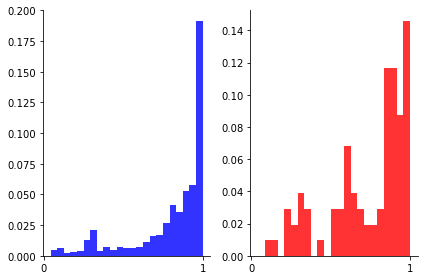

In [279]:
bin_=np.linspace(0,1,25)[1:]
fig, ax = plt.subplots(1,2)
weights_salam = np.ones_like(tot_shifts_salam)/float(len(tot_shifts_salam))
ax[1].hist(tot_shifts_salam,bins=bin_,weights=weights_salam,alpha=0.8,label='axolotl', color='red')  #,density=True
weights_mouse = np.ones_like(tot_shifts_mouse)/float(len(tot_shifts_mouse))
ax[0].hist(tot_shifts_mouse,bins=bin_,weights=weights_mouse,alpha=.8,label='mouse', color='blue') 
# ax[2].hist(tot_shifts_mouse,bins=bin_,alpha=1,histtype='step',linewidth=3,label='mouse',density=True, color='C2')
# ax[2].hist(tot_shifts_salam,bins=bin_,alpha=1,histtype='step',linewidth=3,label='salamander',density=True, color='C1')
# ax[0].legend()
# ax[1].legend()

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#ax[0].spines['bottom'].set_visible(False)
#ax[0].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
#ax[1].spines['bottom'].set_visible(False)
#ax[1].spines['left'].set_visible(False)
# ax[2].spines['right'].set_visible(False)
# ax[2].spines['top'].set_visible(False)
# #ax[1].spines['bottom'].set_visible(False)
# ax[2].spines['left'].set_visible(False)

#ax[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[0].set_xticks([0,1])
#ax[0].set_yticks([])
#ax[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
ax[1].set_xticks([0,1])
#ax[1].set_yticks([])
#ax[2].tick_params(axis = "x", which = "both", bottom = False, top = False)
# ax[2].set_xticks([0,1])
# ax[2].set_yticks([])


fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/Panel_1D.pdf',format='pdf')

# Figure 2B a (and 2B b ?)

In [12]:
# comparison of LN vs CNN in predicting the PSTHs
mouse_exp_couples=[]
salam_exp_couples=[]
for exp in [11,13,17,19,101,102]:
    if exp==11:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_11/analysis/data2_12mixed_tr19.pkl")
    # if exp==12:
    #     results_folder="/media/samuele/Samuele_01/Exp_12/analysis/ln_32mixed_tr21/"
    #     dataset = Dataset.load("/media/samuele/Samuele_01/Exp_12/analysis/data2_32mixed_tr21.pkl")
    if exp==13:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_13/analysis/data2_select_tr1.pkl")
    if exp==17:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_17/analysis/data2_41mixed_tr28.pkl")
    if exp==19:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_19/analysis/data2_28mixed_tr35.pkl")
    if exp==101:
        cnn_results_folder="/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Salamander1/data.pkl")
    if exp==102:
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Salamander2/data2_23mixed_tr34.pkl")


    dataset.select_cells('all')
    test_x, test_y = dataset.test(averages=False)
    nb_cells=test_y.shape[-1]

    test_x=test_x[:,:,:,0]

    #print(test_y.shape)

    cnn_test_predictions=np.load(os.path.join(cnn_results_folder, 'test_predictions.npy'))
    #these are the CNN results on the testing set
    cnn_test_predictions=np.mean(cnn_test_predictions,axis=0)
    #I average across repetitions because the model is not stochastic and so for the same image gives always the same prediction
    #print(cnn_test_predictions.shape)

    even_test_y = np.mean(test_y[0::2, :, :], axis=0)  # mean over even repetitions
    odd_test_y = np.mean(test_y[1::2, :, :], axis=0)  # mean over odd repetitions
    reliabilities = []
    accuracies_o = []
    accuracies_e = []
    nb_cells=test_y.shape[-1]
    for cell_nb in range(0, nb_cells):
        reliability = corrcoef(even_test_y[:, cell_nb], odd_test_y[:, cell_nb])
        accuracy_o = corrcoef(cnn_test_predictions[:, cell_nb], odd_test_y[:, cell_nb])
        accuracy_e = corrcoef(cnn_test_predictions[:, cell_nb], even_test_y[:, cell_nb])
        reliabilities.append(reliability)
        accuracies_o.append(accuracy_o)
        accuracies_e.append(accuracy_e)
    reliabilities = np.array(reliabilities)
    accuracies_o = np.array(accuracies_o)
    accuracies_e = np.array(accuracies_e)

    max_explainable_var=2/(1+np.sqrt(1/reliabilities**2))
    #the variance in the true data that is explainable. The unexplainable part is due to noise

    nc_cnn_predicted_sigma=(0.5*(accuracies_o+accuracies_e))/np.sqrt(reliabilities)
    #the variance that is actually explained by the model

    #cnn_performance=nc_cnn_predicted_variance/max_explainable_var
    cnn_performance=nc_cnn_predicted_sigma**2

    #print(cnn_performance.shape)

    stim_trials_f= open(ln_results_folder + 'baseline_ln_table_seed_exp{0}.csv'.format(exp))
    stim_trials_f = csv.reader(stim_trials_f,delimiter=",")
    stim_trials=[]
    for row in stim_trials_f:
        stim_trials.append(np.array(row))
    stim_trials = np.array(stim_trials[1:])
    #print(stim_trials)

    ln_pop_perf=[]
    for cell_nb in range(nb_cells):
        dataset.select_cells([cell_nb])
        test_x, test_y = dataset.test(averages=False)
        test_x=test_x[:,:,:,0]
        best_run=int(stim_trials[cell_nb][2])
        if best_run==0: 
            continue            #these are the cells for which the LN model did not converge
        else:
            results_f=ln_results_folder+"c{0:02d}/run_{1:03d}/".format(cell_nb,best_run)
    #         print(results_f)
            ln_test_predictions=np.load(os.path.join(results_f, 'test_predictions.npy'))
            #these are the LN results on the testing set
            ln_test_predictions=np.mean(ln_test_predictions,axis=0)[:,0]
            #I average across repetitions because the model is not stochastic and so for the same image gives always the same prediction
            #print(ln_test_predictions.shape)

            even_test_y = np.mean(test_y[0::2, :], axis=0)[:,0]  # mean over even repetitions
            odd_test_y = np.mean(test_y[1::2, :], axis=0)[:,0]   # mean over odd repetitions
            reliability = corrcoef(even_test_y, odd_test_y)
            accuracy_o = corrcoef(ln_test_predictions, odd_test_y)
            accuracy_e = corrcoef(ln_test_predictions, even_test_y)

            max_explainable_var=2/(1+np.sqrt(1/reliability**2))
            #the variance in the true data that is explainable. The unexplainable part is due to noise

            nc_ln_predicted_sigma=(0.5*(accuracy_o+accuracy_e))/np.sqrt(reliability)
            #the variance that is actually explained by the model

            #ln_performance=nc_ln_predicted_variance/max_explainable_var
            #the percentage of explainable variance that is explained by the model
            ln_performance=nc_ln_predicted_sigma**2

            #print(ln_performance)
            ln_pop_perf.append([cell_nb, ln_performance])
    #print(ln_pop_perf)
    couples=[]
    for x in ln_pop_perf:
        couples.append([x[1], cnn_performance[x[0]]])
    #couples=np.array(couples)
    if exp>100: salam_exp_couples+=couples
    else: mouse_exp_couples+=couples

#couples of LN vs CNN performances per each cell for which both models converged        
mouse_exp_couples=np.array(mouse_exp_couples)
salam_exp_couples=np.array(salam_exp_couples)

In [3]:
print(mouse_exp_couples.shape, salam_exp_couples.shape )

(78, 2) (49, 2)


### p-value of the fact that LN is worse than CNN in predicting PSTHs

In [15]:
w, p_mouse = wilcoxon(mouse_exp_couples[:,0], mouse_exp_couples[:,1])
w, p_salam = wilcoxon(salam_exp_couples[:,0], salam_exp_couples[:,1])

print(p_mouse,p_salam)

1.0266989481298551e-07 3.4724654584974695e-08


# Figure 2B a

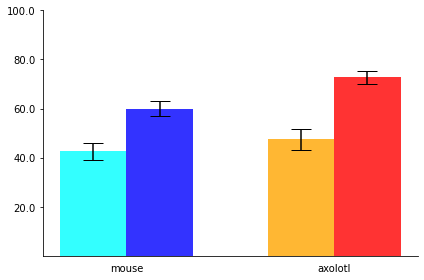

In [16]:
ln_means=[mouse_exp_couples[:,0].mean(),salam_exp_couples[:,0].mean()]
cnn_means=[mouse_exp_couples[:,1].mean(),salam_exp_couples[:,1].mean()]

ln_errs=[mouse_exp_couples[:,0].std()/np.sqrt(len(mouse_exp_couples[:,0])),salam_exp_couples[:,0].std()/np.sqrt(len(salam_exp_couples[:,0]))]
cnn_errs=[mouse_exp_couples[:,1].std()/np.sqrt(len(mouse_exp_couples[:,1])),salam_exp_couples[:,1].std()/np.sqrt(len(salam_exp_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6,.8,1.0])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ba.pdf',format='pdf')
plt.show()

In [17]:
ln_means, cnn_means, ln_errs, cnn_errs

([0.42575416802426136, 0.4752597265151483],
 [0.5997676664688983, 0.7272032452347867],
 [0.03497266894922851, 0.043271901829666726],
 [0.029159784636057576, 0.02684625984006454])

0.0009765625 0.015625


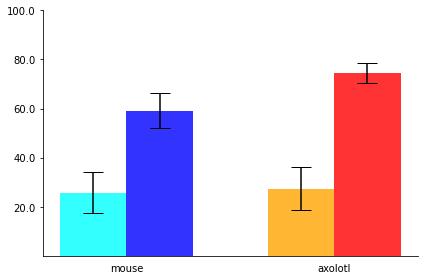

In [12]:
# I redo the same thing I did for figure 2B but only for the inverting cells
mouse_exp_couples=[]
salam_exp_couples=[]
for exp in [11,13,17,19,101,102]:
    if exp==11:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_11/analysis/data2_12mixed_tr19.pkl")
    # if exp==12:
    #     results_folder="/media/samuele/Samuele_01/Exp_12/analysis/ln_32mixed_tr21/"
    #     dataset = Dataset.load("/media/samuele/Samuele_01/Exp_12/analysis/data2_32mixed_tr21.pkl")
    if exp==13:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_13/analysis/data2_select_tr1.pkl")
    if exp==17:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_17/analysis/data2_41mixed_tr28.pkl")
    if exp==19:
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Exp_19/analysis/data2_28mixed_tr35.pkl")
    if exp==101:
        cnn_results_folder="/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Salamander1/data.pkl")
    if exp==102:
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        dataset = Dataset.load("/media/samuele/Samuele_01/Salamander2/data2_23mixed_tr34.pkl")

    #the ones listed here are the intersection between the modelled cells and the cells that were detected to invert
    #by the Berens
    if exp==11: inverting_cells_idx=[2] #68
    if exp==13: inverting_cells_idx=[1,6]  #186,634
    if exp==17: inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
    if exp==19: inverting_cells_idx=[12] #237
    if exp==101:inverting_cells_idx=[3,5,19]  #871,857,842
#     if exp==101:inverting_cells_idx=[5,11]  #842,871
    if exp==102:inverting_cells_idx=[2,7,9,12] #999,1029,1046,1055
    #21 cells
    
    dataset.select_cells('all')
    test_x, test_y = dataset.test(averages=False)
    nb_cells=test_y.shape[-1]

    test_x=test_x[:,:,:,0]

    #print(test_y.shape)

    cnn_test_predictions=np.load(os.path.join(cnn_results_folder, 'test_predictions.npy'))
    #these are the CNN results on the testing set
    cnn_test_predictions=np.mean(cnn_test_predictions,axis=0)
    #I average across repetitions because the model is not stochastic and so for the same image gives always the same prediction
    #print(cnn_test_predictions.shape)

    even_test_y = np.mean(test_y[0::2, :, :], axis=0)  # mean over even repetitions
    odd_test_y = np.mean(test_y[1::2, :, :], axis=0)  # mean over odd repetitions
    reliabilities = []
    accuracies_o = []
    accuracies_e = []
    nb_cells=test_y.shape[-1]
    for cell_nb in range(0, nb_cells):
        reliability = corrcoef(even_test_y[:, cell_nb], odd_test_y[:, cell_nb])
        accuracy_o = corrcoef(cnn_test_predictions[:, cell_nb], odd_test_y[:, cell_nb])
        accuracy_e = corrcoef(cnn_test_predictions[:, cell_nb], even_test_y[:, cell_nb])
        reliabilities.append(reliability)
        accuracies_o.append(accuracy_o)
        accuracies_e.append(accuracy_e)
    reliabilities = np.array(reliabilities)
    accuracies_o = np.array(accuracies_o)
    accuracies_e = np.array(accuracies_e)

    max_explainable_var=2/(1+np.sqrt(1/reliabilities**2))
    #the variance in the true data that is explainable. The unexplainable part is due to noise

    nc_cnn_predicted_sigma=(0.5*(accuracies_o+accuracies_e))/np.sqrt(reliabilities)
    #the variance that is actually explained by the model

    #cnn_performance=nc_cnn_predicted_variance/max_explainable_var
    cnn_performance=nc_cnn_predicted_sigma**2

    #print(cnn_performance.shape)

    stim_trials_f= open(ln_results_folder + 'baseline_ln_table_seed_exp{0}.csv'.format(exp))
    stim_trials_f = csv.reader(stim_trials_f,delimiter=",")
    stim_trials=[]
    for row in stim_trials_f:
        stim_trials.append(np.array(row))
    stim_trials = np.array(stim_trials[1:])
    #print(stim_trials)

    ln_pop_perf=[]
    #for cell_nb in range(nb_cells):   #this is what I loop over in the previous cell
    for cell_nb in inverting_cells_idx:
        dataset.select_cells([cell_nb])
        test_x, test_y = dataset.test(averages=False)
        test_x=test_x[:,:,:,0]
        best_run=int(stim_trials[cell_nb][2])
        if best_run==0: 
            continue            #these are the cells for which the LN model did not converge
        else:
            results_f=ln_results_folder+"c{0:02d}/run_{1:03d}/".format(cell_nb,best_run)
    #         print(results_f)
            ln_test_predictions=np.load(os.path.join(results_f, 'test_predictions.npy'))
            #these are the LN results on the testing set
            ln_test_predictions=np.mean(ln_test_predictions,axis=0)[:,0]
            #I average across repetitions because the model is not stochastic and so for the same image gives always the same prediction
            #print(ln_test_predictions.shape)

            even_test_y = np.mean(test_y[0::2, :], axis=0)[:,0]  # mean over even repetitions
            odd_test_y = np.mean(test_y[1::2, :], axis=0)[:,0]   # mean over odd repetitions
            reliability = corrcoef(even_test_y, odd_test_y)
            accuracy_o = corrcoef(ln_test_predictions, odd_test_y)
            accuracy_e = corrcoef(ln_test_predictions, even_test_y)

            max_explainable_var=2/(1+np.sqrt(1/reliability**2))
            #the variance in the true data that is explainable. The unexplainable part is due to noise

            nc_ln_predicted_sigma=(0.5*(accuracy_o+accuracy_e))/np.sqrt(reliability)
            #the variance that is actually explained by the model

            #ln_performance=nc_ln_predicted_variance/max_explainable_var
            #the percentage of explainable variance that is explained by the model
            ln_performance=nc_ln_predicted_sigma**2

            #print(ln_performance)
            ln_pop_perf.append([cell_nb, ln_performance])
    #print(ln_pop_perf)
    couples=[]
    for x in ln_pop_perf:
        couples.append([x[1], cnn_performance[x[0]]])
    #couples=np.array(couples)
    if exp>100: salam_exp_couples+=couples
    else: mouse_exp_couples+=couples

#couples of LN vs CNN performances per each cell for which both models converged        
mouse_exp_couples=np.array(mouse_exp_couples)
salam_exp_couples=np.array(salam_exp_couples)

w, p_mouse = wilcoxon(mouse_exp_couples[:,0], mouse_exp_couples[:,1])
w, p_salam = wilcoxon(salam_exp_couples[:,0], salam_exp_couples[:,1])

print(p_mouse,p_salam)

ln_means=[mouse_exp_couples[:,0].mean(),salam_exp_couples[:,0].mean()]
cnn_means=[mouse_exp_couples[:,1].mean(),salam_exp_couples[:,1].mean()]

ln_errs=[mouse_exp_couples[:,0].std()/np.sqrt(len(mouse_exp_couples[:,0])),salam_exp_couples[:,0].std()/np.sqrt(len(salam_exp_couples[:,0]))]
cnn_errs=[mouse_exp_couples[:,1].std()/np.sqrt(len(mouse_exp_couples[:,1])),salam_exp_couples[:,1].std()/np.sqrt(len(salam_exp_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6,.8,1.0])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ba_only on inverting.pdf',format='pdf')
plt.show()

# Figure 2B b

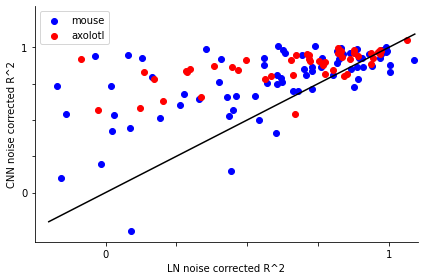

In [7]:
fig, ax = plt.subplots()

opacity = 0.8

ax.scatter(mouse_exp_couples[:,0], mouse_exp_couples[:,1], color='blue', label='mouse')
ax.scatter(salam_exp_couples[:,0], salam_exp_couples[:,1], color='red', label='axolotl')
plt.plot(np.arange(-.2,1.1,.01), np.arange(-.2,1.1,.01), color='black')
plt.xlim(-0.25,1.1)

ax.set_xlabel('LN noise corrected R^2')
ax.set_ylabel('CNN noise corrected R^2')
#ax.set_title('Scores by group and gender')
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xticklabels([0,'','','',1])
#plt.xlabel(labels[0])
#plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels([0,'','','',1])
ax.legend(loc='best')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2B.pdf',format='pdf')
plt.show()


In [8]:
# results_folder= '/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019/'
# test_observations=np.load(os.path.join(results_folder, 'test_observations.npy'))
# test_predictions=np.load(os.path.join(results_folder, 'test_predictions.npy'))

# ln_results_folder= '/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/c07/run_003/'
# ln_test_observations=np.load(os.path.join(ln_results_folder, 'test_observations.npy'))
# ln_test_predictions=np.load(os.path.join(ln_results_folder, 'test_predictions.npy'))

# for cell in range(test_predictions.shape[-1]):
#     plt.figure()
#     plt.plot(np.mean(test_observations,axis=0)[:,cell],label='True')
#     plt.plot(np.mean(test_predictions,axis=0)[:,cell],label='predicted')
#     plt.legend()

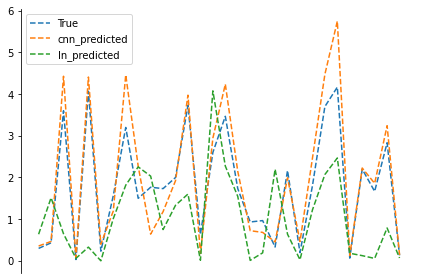

In [189]:
# cell=8
# fig, ax = plt.subplots()

# opacity = 1

# ax.plot(np.mean(test_observations,axis=0)[:,cell],'--',label='True')
# ax.plot(np.mean(test_predictions,axis=0)[:,cell],'--',label='cnn_predicted')
# ax.plot(np.mean(ln_test_predictions,axis=0)[:,0],'--',label='ln_predicted')

# ax.set_xticks([])
# #ax.set_xticklabels(labels)
# plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# #yticks=np.array([.2,.4,.6,.8,1.0])
# #ax.set_yticks(yticks)
# #ax.set_yticklabels(yticks)
# ax.legend()

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# #ax.spines['left'].set_visible(False)

# #ax.bar_label(rects1, padding=3)
# #ax.bar_label(rects2, padding=3)

# fig.tight_layout()
# #fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2B.pdf',format='pdf')
# plt.show()

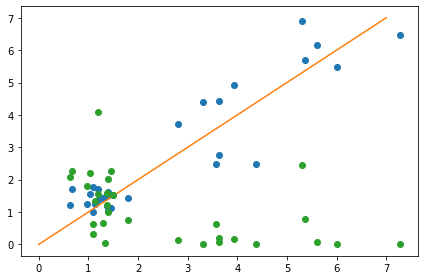

In [188]:
# fig, ax = plt.subplots()

# opacity = 1
# x=np.arange(np.mean(test_observations,axis=0)[:,cell].max())
# ax.plot(np.mean(test_observations,axis=0)[:,cell],np.mean(test_predictions,axis=0)[:,cell], 'o' )
# ax.plot(x,x)
# ax.plot(np.mean(test_observations,axis=0)[:,cell],np.mean(ln_test_predictions,axis=0)[:,0], 'o' )

# fig.tight_layout()
# #fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2B.pdf',format='pdf')
# plt.show()

# Figure 2E a (and 2E b ?)

In [222]:
# per each image shown to each modelled cell in each experiment, this code takes the predicted LSTA of both the LN 
# and the CNN model and computes its correlation coefficient with the experimental LSTA of the same image. 
# the experimental LSTA before correlation is denoised by a gaussian blur and it is fitted with a gaussian envelope

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

mouse_lstaspred_couples=[]
salam_lstaspred_couples=[]
for exp in [11,13,17,19,101,102]: #[102]:#
    if exp==11:
        model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
        label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==13: 
        model_cell_list=[91,186,202,225,257,621,634,684,748]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
        label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==17: 
        model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        nb_imgs=8
        pert_nb=1000
        m=4
    if exp==19: 
        model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
        pert_nb=1000
        m=5
    if exp==101:
        model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
        cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200 
        m=5
    if exp==102:
        model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200
        m=5

    corr_coeffs_gaussfit_cnn=np.zeros((len(model_cell_list),nb_imgs))
    corr_coeffs_gaussfit_ln=np.zeros((len(model_cell_list),nb_imgs))
    
    test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
    test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
    if exp>100: pert_testing=[30,0,1,21]
    if exp==19: pert_testing=[19,12,16,24]
    if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
    else:pert_testing=[30,0,1,19,8,12,11]
        
    for idx,cell in enumerate(model_cell_list):
        if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
        else:
            exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
            #I load the experimental LSTAs of one cell for all the images
            for nb,im in enumerate(exp_lstas): # I iterate over the images
                if exp>100: denoised_im=gaussian(im,sigma=.2)  #I change sigma across animals because the resolution of the checkerboard is different
                else: denoised_im=gaussian(im,sigma=1)
                res_img=resize(denoised_im, (108, 108), anti_aliasing=True)

                if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
                if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
                try: 
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
                    cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
                    ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
                    corr_coeffs_gaussfit_cnn[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
                    corr_coeffs_gaussfit_ln[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])
                except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
    list1_=[]
    filter_thresh=0.
    for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_cnn):
        if list(filter(lambda x : abs(x)>filter_thresh, list_)):
            list1_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
        else: list1_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
    list1=np.array(list1_)  
    
    list2_=[]
    for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_ln):
        if list(filter(lambda x : abs(x) >filter_thresh, list_)):
            list2_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
        else: list2_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
    list2=np.array(list2_)
    
    for correl in list1:   #I create couples of LN vs CNN values, excluding the cells for which either one of the two values was 0
        #print(list2[int(correl[0]),1])
        if correl[1]==0.: continue
        elif list2[int(correl[0]),1]==0.: continue
        else:
            if exp>100: salam_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
            else: mouse_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
                
salam_lstaspred_couples=np.array(salam_lstaspred_couples)
mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

### p-value of the fact that LN is worse than CNN in predicting LSTAs

In [223]:
w, p_mouse = wilcoxon(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1])
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])

print(p_mouse, p_salam)  #thresholding does not help
#print(p_salam)

3.744775586022836e-06 0.5117637478221086


# Figure 2E a

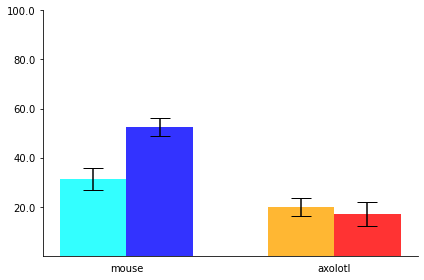

In [224]:
ln_means=[mouse_lstaspred_couples[:,0].mean(),salam_lstaspred_couples[:,0].mean()]
cnn_means=[mouse_lstaspred_couples[:,1].mean(),salam_lstaspred_couples[:,1].mean()]

ln_errs=[mouse_lstaspred_couples[:,0].std()/np.sqrt(len(mouse_lstaspred_couples[:,0])),salam_lstaspred_couples[:,0].std()/np.sqrt(len(salam_lstaspred_couples[:,0]))]
cnn_errs=[mouse_lstaspred_couples[:,1].std()/np.sqrt(len(mouse_lstaspred_couples[:,1])),salam_lstaspred_couples[:,1].std()/np.sqrt(len(salam_lstaspred_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6,.8,1.0])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ea.pdf',format='pdf')
plt.show()

# Figure 2E b

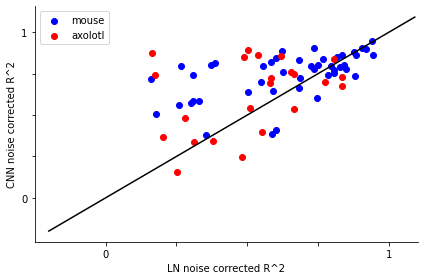

In [97]:
fig, ax = plt.subplots()

opacity = 0.8

ax.scatter(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1], color='blue', label='mouse')
ax.scatter(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1], color='red', label='axolotl')
plt.plot(np.arange(-.2,1.1,.01), np.arange(-.2,1.1,.01), color='black')
plt.xlim(-0.25,1.1)

ax.set_xlabel('LN noise corrected R^2')
ax.set_ylabel('CNN noise corrected R^2')
#ax.set_title('Scores by group and gender')
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xticklabels([0,'','','',1])
#plt.xlabel(labels[0])
#plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels([0,'','','',1])
ax.legend(loc='best')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Eb.pdf',format='pdf')
plt.show()

# Figure 2E only made on inverting cells with its p-value and graph

In [270]:
# this cell redoes all that it is done in cell 2E a but only for the inverting cells

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

mouse_lstaspred_couples=[]
salam_lstaspred_couples=[]
for exp in [11,13,17,19,101,102]: #[102]:#
    if exp==11:
        model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
        label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==13: 
        model_cell_list=[91,186,202,225,257,621,634,684,748]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
        label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==17: 
        model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        nb_imgs=8
        pert_nb=1000
        m=4
    if exp==19: 
        model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
        pert_nb=1000
        m=5
    if exp==101:
        model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
        cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200 
        m=5
    if exp==102:
        model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200
        m=5

    corr_coeffs_gaussfit_cnn=np.zeros((len(model_cell_list),nb_imgs))
    corr_coeffs_gaussfit_ln=np.zeros((len(model_cell_list),nb_imgs))
    
    test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
    test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
    if exp>100: pert_testing=[30,0,1,21]
    if exp==19: pert_testing=[19,12,16,24]
    if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
    else:pert_testing=[30,0,1,19,8,12,11]
    
    #the ones listed here are the intersection between the modelled cells and the cells that were detected to invert
    #by the Berens
    if exp==11: inverting_cells_idx=[2] #68
    if exp==13: inverting_cells_idx=[1,6]  #186,634
    if exp==17: inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
    if exp==19: inverting_cells_idx=[12] #237
    if exp==101:inverting_cells_idx=[3,5,19]   #871,857,842
    if exp==102:inverting_cells_idx=[2,7,9,12] #999,1029,1046,1055
    #20 cells
    
    for inv_idx in inverting_cells_idx:
    #for idx,cell in enumerate(model_cell_list):  #how the loop run in cell 2E
        idx=inv_idx
        cell=model_cell_list[inv_idx]
        if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
        else:
            exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
            #I load the experimental LSTAs of one cell for all the images
            for nb,im in enumerate(exp_lstas): # I iterate over the images
#                 if exp>100: denoised_im=gaussian(im,sigma=1)  #I change sigma across animals because the resolution of the checkerboard is different
#                 else: denoised_im=gaussian(im,sigma=1)
                #res_img=resize(denoised_im, (108, 108), anti_aliasing=True)
                res_img=resize(im, (108, 108), anti_aliasing=True)

                if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
                if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
                try: 
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
                    cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
                    ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
                    corr_coeffs_gaussfit_cnn[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
                    corr_coeffs_gaussfit_ln[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])
                except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
    list1_=[]
    filter_thresh=0.
    for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_cnn):
        if list(filter(lambda x : abs(x)>filter_thresh, list_)):
            list1_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
        else: list1_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
    list1=np.array(list1_)  
    
    list2_=[]
    for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_ln):
        if list(filter(lambda x : abs(x) >filter_thresh, list_)):
            list2_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
        else: list2_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
    list2=np.array(list2_)
    
    for correl in list1:   #I create couples of LN vs CNN values, excluding the cells for which either one of the two values was 0
        #print(list2[int(correl[0]),1])
        if correl[1]==0.: continue
        elif list2[int(correl[0]),1]==0.: continue
        else:
            if exp>100: salam_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
            else: mouse_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
                
salam_lstaspred_couples=np.array(salam_lstaspred_couples)
mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

In [271]:
w, p_mouse = wilcoxon(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1])
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])

print(p_mouse, p_salam)   #thresholding does again not help

0.0009765625 0.375


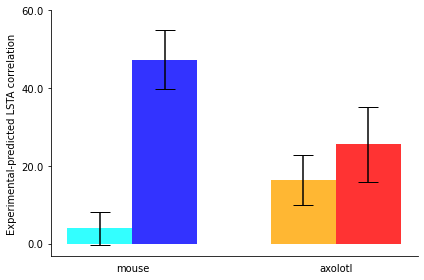

In [272]:
ln_means=[mouse_lstaspred_couples[:,0].mean()+0.01,salam_lstaspred_couples[:,0].mean()]
cnn_means=[mouse_lstaspred_couples[:,1].mean(),salam_lstaspred_couples[:,1].mean()]

ln_errs=[mouse_lstaspred_couples[:,0].std()/np.sqrt(len(mouse_lstaspred_couples[:,0])),salam_lstaspred_couples[:,0].std()/np.sqrt(len(salam_lstaspred_couples[:,0]))]
cnn_errs=[mouse_lstaspred_couples[:,1].std()/np.sqrt(len(mouse_lstaspred_couples[:,1])),salam_lstaspred_couples[:,1].std()/np.sqrt(len(salam_lstaspred_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Experimental-predicted LSTA correlation')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([0.,.2,.4,.6])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ea.pdf',format='pdf')
plt.show()

0.23814750356516276
0.42786218825127587
-0.1941470458938233
0.001806053250711001
0.1682125155092911
0.3075534841988824
-0.23108241108900446
-0.0684164137096353
-0.24485660923240923
0.14890929896295965
0.6630845677873447
0.6423046369509622
-0.7531392071725477
0.45230611989509406
-0.313444584213637
0.5065739325365745


<ipython-input-260-39d6e46b53c8>:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


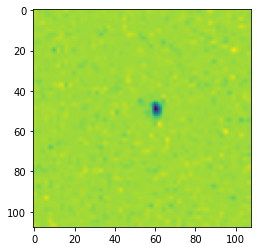

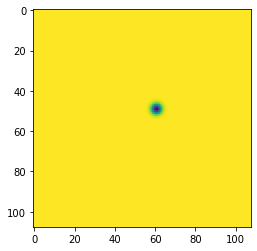

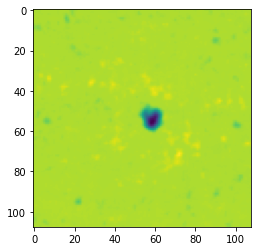

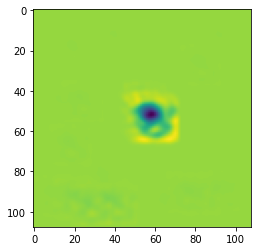

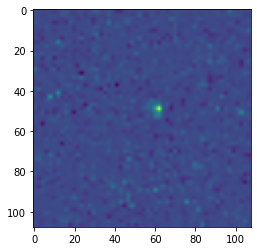

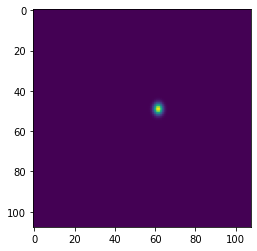

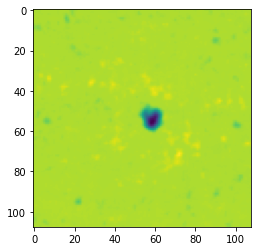

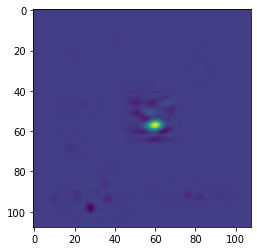

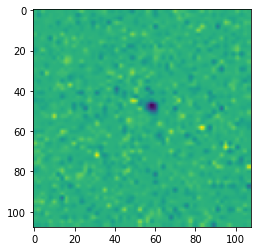

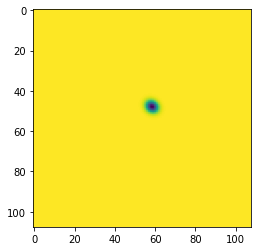

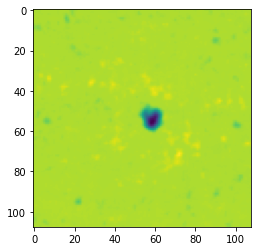

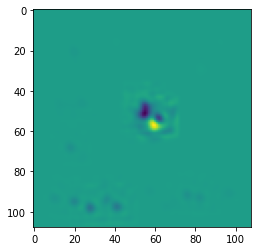

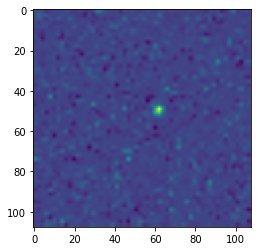

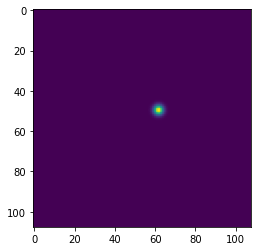

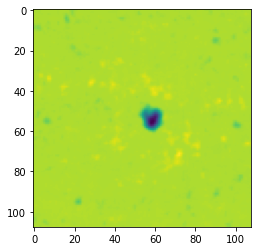

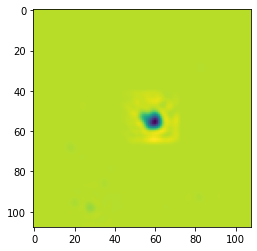

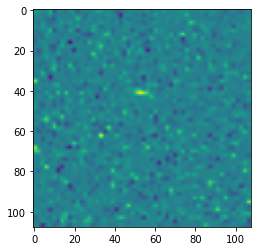

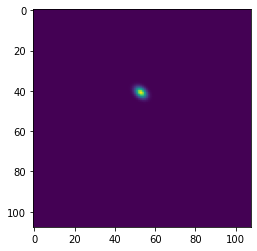

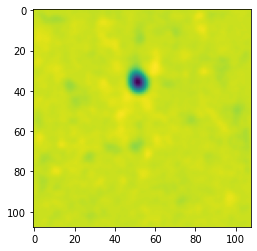

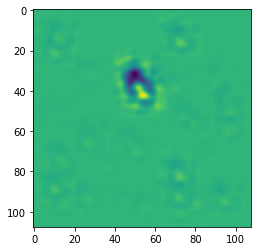

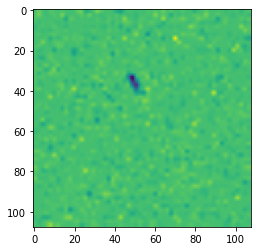

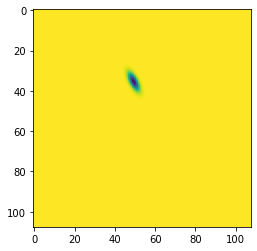

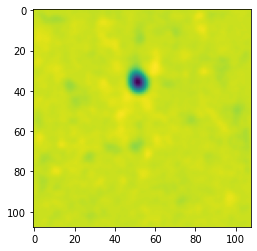

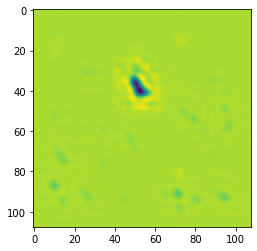

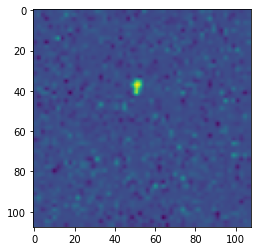

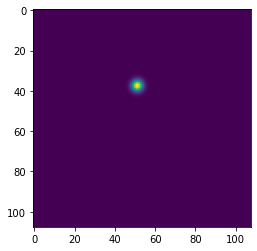

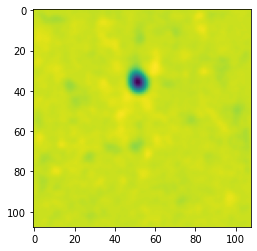

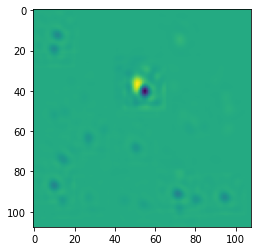

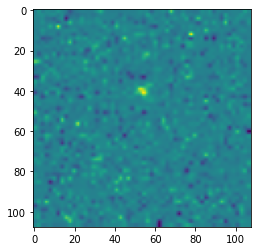

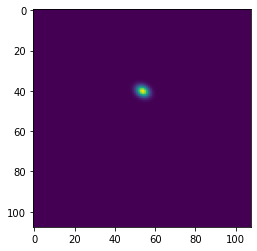

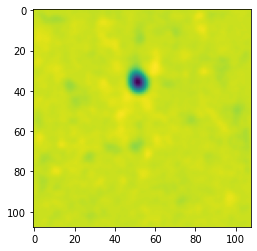

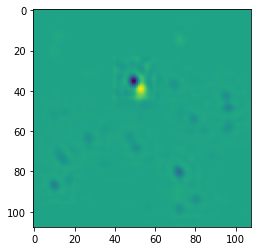

In [260]:
# # eviscerating the problem (debug)

# x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
# def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
#     x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
#     y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
#     return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
# def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
#     x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
#     y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
#     return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

# mouse_lstaspred_couples=[]
# salam_lstaspred_couples=[]
# for exp in [101]: 
#     if exp==11:
#         model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
#         cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
#         ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
#         pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
#         label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
#         nb_imgs=7
#         pert_nb=1200
#         m=2
#     if exp==13: 
#         model_cell_list=[91,186,202,225,257,621,634,684,748]
#         cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
#         ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
#         pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
#         label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
#         nb_imgs=7
#         pert_nb=1200
#         m=2
#     if exp==17: 
#         model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
#         cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
#         ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
#         pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
#         label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
#         nb_imgs=8
#         pert_nb=1000
#         m=4
#     if exp==19: 
#         model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
#         cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
#         ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
#         pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
#         label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
#         nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
#         pert_nb=1000
#         m=5
#     if exp==101:
#         model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
#         cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
#         ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
#         pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
#         label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
#         nb_imgs=4
#         pert_nb=1200 
#         m=5
#     if exp==102:
#         model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
#         cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
#         ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
#         pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
#         label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
#         nb_imgs=4
#         pert_nb=1200
#         m=5

#     corr_coeffs_gaussfit_cnn=np.zeros((len(model_cell_list),nb_imgs))
#     corr_coeffs_gaussfit_ln=np.zeros((len(model_cell_list),nb_imgs))
    
#     test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
#     test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
#     if exp>100: pert_testing=[30,0,1,21]
#     if exp==19: pert_testing=[19,12,16,24]
#     if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
#     else:pert_testing=[30,0,1,19,8,12,11]
    
#     #the ones listed here are the intersection between the modelled cells and the cells that were detected to invert
#     #by the Berens
#     if exp==11: inverting_cells_idx=[2] #68
#     if exp==13: inverting_cells_idx=[1,6]  #186,634
#     if exp==17: inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
#     if exp==19: inverting_cells_idx=[12] #237
#     if exp==101:inverting_cells_idx=[3,5,19]   #842,871
#     if exp==102:inverting_cells_idx=[2,7,9,12] #999,1029,1046,1055
#     #20 cells
    
#     for inv_idx in inverting_cells_idx:
#     #for idx,cell in enumerate(model_cell_list):  #how the loop run in cell 2E
#         idx=inv_idx
#         cell=model_cell_list[inv_idx]
#         if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
#         else:
#             exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
#             #I load the experimental LSTAs of one cell for all the images
#             for nb,im in enumerate(exp_lstas): # I iterate over the images
#                 #if nb==2:
#                 plt.figure()
#                 plt.imshow(resize(im, (108, 108), anti_aliasing=True))
#                 if exp>100: denoised_im=gaussian(im,sigma=.2)  #I change sigma across animals because the resolution of the checkerboard is different
#                 else: denoised_im=gaussian(im,sigma=1)
#                 res_img=resize(denoised_im, (108, 108), anti_aliasing=True)
# #                 res_img=resize(im, (108, 108), anti_aliasing=True)

#                 if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
#                 if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
#                 #try: 
#                 best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
#                 cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
#                 ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
#                 corr_coeffs_gaussfit_cnn[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
#                 corr_coeffs_gaussfit_ln[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])

#                 plt.figure()
#                 plt.imshow(gaussian_filt_1((x,y), *best_vals).reshape(108,108))
#                 plt.figure()
#                 plt.imshow(ln_model_pred)
#                 plt.figure()
#                 plt.imshow(cnn_model_pred)
#                 print(corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
#                 print(corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
#                 #except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
#     list1_=[]
#     filter_thresh=0
#     for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_cnn):
#         if list(filter(lambda x : abs(x)>filter_thresh, list_)):
#             list1_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
#         else: list1_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
#     list1=np.array(list1_)  
    
#     list2_=[]
#     for cell_nb,list_ in enumerate(corr_coeffs_gaussfit_ln):
#         if list(filter(lambda x : abs(x) >filter_thresh, list_)):
#             list2_.append((cell_nb,np.array(list(filter(lambda x : abs(x) >filter_thresh, list_ ))).mean()) )   #for each cell I average the correlations across the LSTAs of the various images, excluding the ones that were not detected or properly fitted by the gaussian
#         else: list2_.append((cell_nb,0))  #if the cell had all non detected or detected but not fitted LSTAs I add a zero 
#     list2=np.array(list2_)
    
#     for correl in list1:   #I create couples of LN vs CNN values, excluding the cells for which either one of the two values was 0
#         #print(list2[int(correl[0]),1])
#         if correl[1]==0.: continue
#         elif list2[int(correl[0]),1]==0.: continue
#         else:
#             if exp>100: salam_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
#             else: mouse_lstaspred_couples.append([list2[int(correl[0]),1], correl[1]])
                
# salam_lstaspred_couples=np.array(salam_lstaspred_couples)
# mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

In [261]:
a=np.array([815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917])
a.shape

(27,)

In [124]:
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])
p_salam

0.15625

In [265]:
#I do the same as above (only on inverting cells) but without averaging cell-wise

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

mouse_lstaspred_couples=[]
salam_lstaspred_couples=[]
for exp in [11,13,17,19,101,102]: 
    if exp==11:
        model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
        label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==13: 
        model_cell_list=[91,186,202,225,257,621,634,684,748]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
        label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==17: 
        model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        nb_imgs=8
        pert_nb=1000
        m=4
    if exp==19: 
        model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
        pert_nb=1000
        m=5
    if exp==101:
        #model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
        model_cell_list=[100,100,100,871,100,857,100,100,100,100,100,100,100,100,889,100,100,100,100,842,100,100,100,100,100,100,100]
        cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200 
        m=5
    if exp==102:
        model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200
        m=5

        
    #the ones listed here are the intersection between the modelled cells and the cells that were detected to invert
    #by the Berens
    if exp==11: inverting_cells_idx=[2] #68
    if exp==13: inverting_cells_idx=[1,6]  #186,634
    if exp==17: inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
    if exp==19: inverting_cells_idx=[12] #237
    if exp==101:inverting_cells_idx=[3,5,19]  #871,857,842
#     if exp==101:inverting_cells_idx=[5,11]  #842,871
    if exp==102:inverting_cells_idx=[2,7,9,12] #999,1029,1046,1055
    #21 cells
    
    corr_coeffs_gaussfit_cnn=np.zeros((len(inverting_cells_idx),nb_imgs))
    corr_coeffs_gaussfit_ln=np.zeros((len(inverting_cells_idx),nb_imgs))
    
    test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
    test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
    if exp>100: pert_testing=[30,0,1,21]
    if exp==19: pert_testing=[19,12,16,24]
    if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
    else:pert_testing=[30,0,1,19,8,12,11]
    
    
    for k,inv_idx in enumerate(inverting_cells_idx):
    #for idx,cell in enumerate(model_cell_list):  #how the loop run in cell 2E
        idx=inv_idx
        cell=model_cell_list[inv_idx]
        if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
        else:
            exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
            #I load the experimental LSTAs of one cell for all the images
            for nb,im in enumerate(exp_lstas): # I iterate over the images
                #if nb==2:
#                 plt.figure()
#                 plt.imshow(resize(im, (108, 108), anti_aliasing=True))
                if exp>100: denoised_im=gaussian(im,sigma=.2)  #I change sigma across animals because the resolution of the checkerboard is different
                else: denoised_im=gaussian(im,sigma=1)
                res_img=resize(denoised_im, (108, 108), anti_aliasing=True)
                #res_img=resize(im, (108, 108), anti_aliasing=True)

                if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
                if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
                try: 
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
                    cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
                    ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
                    corr_coeffs_gaussfit_cnn[k,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
                    corr_coeffs_gaussfit_ln[k,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])

#                     plt.figure()
#                     plt.imshow(gaussian_filt_1((x,y), *best_vals).reshape(108,108))
#                     plt.figure()
#                     plt.imshow(ln_model_pred)
#                     plt.figure()
#                     plt.imshow(cnn_model_pred)
#                     print(corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
#                     print(corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
                except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
                
#     print(corr_coeffs_gaussfit_ln) 
#     print(corr_coeffs_gaussfit_cnn)
    for cell_idx, _ in enumerate(corr_coeffs_gaussfit_ln):
        for im_idx, _ in enumerate(corr_coeffs_gaussfit_ln[0]):
            if corr_coeffs_gaussfit_ln[cell_idx,im_idx]==0.: continue
            elif corr_coeffs_gaussfit_cnn[cell_idx,im_idx]==0.: continue
            else:
                if exp>100: salam_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
                else: mouse_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
salam_lstaspred_couples=np.array(salam_lstaspred_couples)
mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

In [266]:
w, p_mouse = wilcoxon(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1])
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])

print(p_mouse, p_salam)

1.0801060403046376e-09 0.04902855820598209


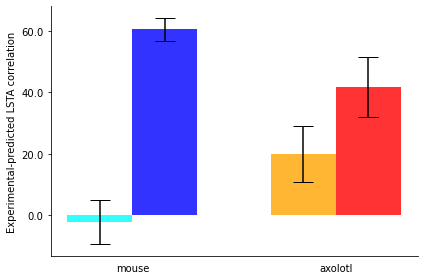

In [267]:
ln_means=[mouse_lstaspred_couples[:,0].mean()+0.01,salam_lstaspred_couples[:,0].mean()]
cnn_means=[mouse_lstaspred_couples[:,1].mean(),salam_lstaspred_couples[:,1].mean()]

ln_errs=[mouse_lstaspred_couples[:,0].std()/np.sqrt(len(mouse_lstaspred_couples[:,0])),salam_lstaspred_couples[:,0].std()/np.sqrt(len(salam_lstaspred_couples[:,0]))]
cnn_errs=[mouse_lstaspred_couples[:,1].std()/np.sqrt(len(mouse_lstaspred_couples[:,1])),salam_lstaspred_couples[:,1].std()/np.sqrt(len(salam_lstaspred_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Experimental-predicted LSTA correlation')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([0.,.2,.4,.6])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ea.pdf',format='pdf')
plt.show()

In [248]:
# Here, I redo the quantification on the whole pupulation but without averaging cell-wise

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

mouse_lstaspred_couples=[]
salam_lstaspred_couples=[]
for exp in [11,13,17,19,101,102]: #[102]:#
    if exp==11:
        model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
        label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==13: 
        model_cell_list=[91,186,202,225,257,621,634,684,748]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
        label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==17: 
        model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        nb_imgs=8
        pert_nb=1000
        m=4
    if exp==19: 
        model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
        pert_nb=1000
        m=5
    if exp==101:
        model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
        cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200 
        m=5
    if exp==102:
        model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200
        m=5

    corr_coeffs_gaussfit_cnn=np.zeros((len(model_cell_list),nb_imgs))
    corr_coeffs_gaussfit_ln=np.zeros((len(model_cell_list),nb_imgs))
    
    test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
    test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
    if exp>100: pert_testing=[30,0,1,21]
    if exp==19: pert_testing=[19,12,16,24]
    if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
    else:pert_testing=[30,0,1,19,8,12,11]
        
    for idx,cell in enumerate(model_cell_list):
        if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
        else:
            exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
            #I load the experimental LSTAs of one cell for all the images
            for nb,im in enumerate(exp_lstas): # I iterate over the images
                if exp>100: denoised_im=gaussian(im,sigma=1)  #I change sigma across animals because the resolution of the checkerboard is different
                else: denoised_im=gaussian(im,sigma=1)
                res_img=resize(denoised_im, (108, 108), anti_aliasing=True)

                if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
                if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
                try: 
                    best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
                    cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
                    ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
                    corr_coeffs_gaussfit_cnn[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
                    corr_coeffs_gaussfit_ln[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])
                except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
    
    for cell_idx, _ in enumerate(corr_coeffs_gaussfit_ln):
        for im_idx, _ in enumerate(corr_coeffs_gaussfit_ln[0]):
            if corr_coeffs_gaussfit_ln[cell_idx,im_idx]==0.: continue
            elif corr_coeffs_gaussfit_cnn[cell_idx,im_idx]==0.: continue
            else:
                if exp>100: salam_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
                else: mouse_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
salam_lstaspred_couples=np.array(salam_lstaspred_couples)
mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

In [249]:
w, p_mouse = wilcoxon(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1])
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])

print(p_mouse, p_salam)   #changing the sigma does not help 

1.846643151398801e-17 0.057480508596954485


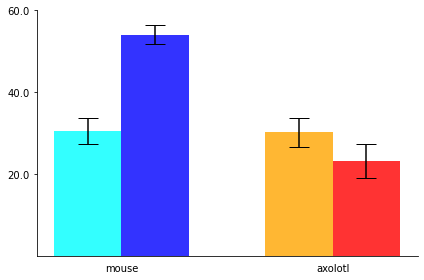

In [250]:
ln_means=[mouse_lstaspred_couples[:,0].mean()+0.01,salam_lstaspred_couples[:,0].mean()]
cnn_means=[mouse_lstaspred_couples[:,1].mean(),salam_lstaspred_couples[:,1].mean()]

ln_errs=[mouse_lstaspred_couples[:,0].std()/np.sqrt(len(mouse_lstaspred_couples[:,0])),salam_lstaspred_couples[:,0].std()/np.sqrt(len(salam_lstaspred_couples[:,0]))]
cnn_errs=[mouse_lstaspred_couples[:,1].std()/np.sqrt(len(mouse_lstaspred_couples[:,1])),salam_lstaspred_couples[:,1].std()/np.sqrt(len(salam_lstaspred_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ea.pdf',format='pdf')
plt.show()

In [273]:
# Finally, I redo the quantification without averaging cell-wise just for the non-inverting cells

x, y = np.meshgrid(np.linspace(0,108,108), np.linspace(0,108,108))
def gaussian_filt( x,y ,x0,y0,sx,sy,theta,amp):
    x1=x*np.cos(theta)-y*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=y*np.cos(theta)+x*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))
def gaussian_filt_1( input_ ,x0,y0,sx,sy,theta,amp):
    x1=input_[0]*np.cos(theta)-input_[1]*np.sin(theta)-x0*np.cos(theta)+y0*np.sin(theta)
    y1=input_[1]*np.cos(theta)+input_[0]*np.sin(theta)-y0*np.cos(theta)-x0*np.sin(theta)
    return (amp*np.exp(-((x1**2. / (2. * sx**2.) + (y1)**2. / (2. * sy**2.))))).ravel()

mouse_lstaspred_couples=[]
salam_lstaspred_couples=[]
for exp in [11,13,17,19,101,102]: 
    if exp==11:
        model_cell_list=[3,44,68,81,95,134,153,199,310,322,388,478]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_11/analysis/ln_12mixed_tr19/"
        pckls_folder='/media/samuele/Samuele_01/Exp_11/analysis/LSTAs1200_zoom_new/'
        label=np.load('/media/samuele/Samuele_01/Exp_11/analysis/exp_LSTAS_labels_berens_exp11.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==13: 
        model_cell_list=[91,186,202,225,257,621,634,684,748]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/run_097"
        ln_results_folder="/media/samuele/Samuele_01/Exp_13/analysis/ln_9OFF_tr1/"
        pckls_folder='/media/samuele/Samuele_01/Exp_13/analysis/LSTAs_newcode/'
        label=np.load('/media/samuele/Samuele_01/Exp_13/analysis/exp_LSTAS_labels_berens_exp13.npy',allow_pickle=True)
        nb_imgs=7
        pert_nb=1200
        m=2
    if exp==17: 
        model_cell_list=[22,30,78,88,89,116,177,262,285,289,339,349,376,402,412,515,553,561,579,680,708,754,767,776,796,800,862,868,892,910,960,962,991,994,998,1007,1009,1014,1029,1031,1032]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/run_026"
        ln_results_folder="/media/samuele/Samuele_01/Exp_17/analysis/ln_41mixed_tr28/"
        pckls_folder='/media/samuele/Samuele_01/Exp_17/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        nb_imgs=8
        pert_nb=1000
        m=4
    if exp==19: 
        model_cell_list=[6,33,44,65,79,83,89,142,145,153,201,211,237,253,293,299,311,318,329,338,360,385,416,432,435,436,493,604]
        cnn_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/run_019"
        ln_results_folder="/media/samuele/Samuele_01/Exp_19/analysis/ln_28mixed_tr35/"
        pckls_folder='/media/samuele/Samuele_01/Exp_19/analysis/LSTA_1000/'
        label=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        nb_imgs=4   #here I am using only the 4 images that were in the actual testing set
        pert_nb=1000
        m=5
    if exp==101:
        model_cell_list=[815,816,817,821,823,842,850,857,865,868,869,871,883,886,887,888,889,892,894,903,905,907,913,914,915,916,917]
        cnn_results_folder="/media/samuele/Samuele_01/Salamander1/cnn_exp101/run_075"
        ln_results_folder="/media/samuele/Samuele_01/Salamander1/ln_exp101/"
        pckls_folder='/media/samuele/Samuele_01/Salamander1/LSTA_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander1/exp_LSTAS_labels_berens_exp101.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200 
        m=5
    if exp==102:
        model_cell_list=[ 109,  197,  999, 1000, 1009, 1014, 1018, 1029, 1042, 1046, 1047,1051, 1055, 1154, 1165, 1167, 1178, 1181, 1182, 1183, 1184, 1185, 1186] 
        cnn_results_folder="/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/run_030"
        ln_results_folder="/media/samuele/Samuele_01/Salamander2/ln_23mixed_tr34/"
        pckls_folder='/media/samuele/Samuele_01/Salamander2/LSTAs_1200/'
        label=np.load('/media/samuele/Samuele_01/Salamander2/exp_LSTAS_labels_berens_exp102.npy',allow_pickle=True)
        nb_imgs=4
        pert_nb=1200
        m=5

        
    #the ones listed here are the intersection between the modelled cells and the cells that were detected to invert
    #by the Berens
    if exp==11: inverting_cells_idx=[2] #68
    if exp==13: inverting_cells_idx=[1,6]  #186,634
    if exp==17: inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
    if exp==19: inverting_cells_idx=[12] #237
    if exp==101:inverting_cells_idx=[3,5,19]  #871,857,842
    if exp==102:inverting_cells_idx=[2,7,9,12] #999,1029,1046,1055
    #20 cells
    
    corr_coeffs_gaussfit_cnn=np.zeros((len(model_cell_list),nb_imgs))
    corr_coeffs_gaussfit_ln=np.zeros((len(model_cell_list),nb_imgs))
    
    test_cnn_lstas_withgray=np.load(os.path.join(cnn_results_folder, 'lstas.npy'))
    test_LN_lstas_withgray=np.load(os.path.join(ln_results_folder, 'ln_model_lstas_allcells_exp{0}.npy'.format(exp)))
    
    if exp>100: pert_testing=[30,0,1,21]
    if exp==19: pert_testing=[19,12,16,24]
    if exp==17: pert_testing=[16,0,1,19,8,12,11,24]
    else:pert_testing=[30,0,1,19,8,12,11]
    
    
    np.delete(model_cell_list, inverting_cells_idx)
    #for k,inv_idx in enumerate(inverting_cells_idx):
    for idx,cell in enumerate(model_cell_list):  #how the loop run in cell 2E
        if idx in inverting_cells_idx: continue
        else:
            if test_LN_lstas_withgray[idx].sum()==0.: continue #I skip a cell if for that cell the LN did not converge
            else:
                exp_lstas=np.load(pckls_folder+'exp{0}_m{3}_c{1}_s{2}_LSTAs.pkl'.format(exp,cell,pert_nb,m),allow_pickle=True)
                #I load the experimental LSTAs of one cell for all the images
                for nb,im in enumerate(exp_lstas): # I iterate over the images
                    #if nb==2:
    #                 plt.figure()
    #                 plt.imshow(resize(im, (108, 108), anti_aliasing=True))
                    if exp>100: denoised_im=gaussian(im,sigma=.2)  #I change sigma across animals because the resolution of the checkerboard is different
                    else: denoised_im=gaussian(im,sigma=1)
                    res_img=resize(denoised_im, (108, 108), anti_aliasing=True)
                    #res_img=resize(im, (108, 108), anti_aliasing=True)

                    if abs(res_img.min())> abs(res_img.max()): p0=[res_img.argmin()%108, int(res_img.argmin()/108),2,2, 0,-1]
                    if abs(res_img.max())> abs(res_img.min()): p0=[res_img.argmax()%108, int(res_img.argmax()/108),2,2, 0,1]
                    try: 
                        best_vals, covar = curve_fit(gaussian_filt_1, np.array((x, y)), res_img.ravel(), p0=p0)
                        cnn_model_pred=test_cnn_lstas_withgray[idx,pert_testing[nb]]
                        ln_model_pred=test_LN_lstas_withgray[idx,pert_testing[nb]]
                        corr_coeffs_gaussfit_cnn[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])  #I calculate the correlations for the two models
                        corr_coeffs_gaussfit_ln[idx,nb]=corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb])

    #                     plt.figure()
    #                     plt.imshow(gaussian_filt_1((x,y), *best_vals).reshape(108,108))
    #                     plt.figure()
    #                     plt.imshow(ln_model_pred)
    #                     plt.figure()
    #                     plt.imshow(cnn_model_pred)
    #                     print(corrcoef(gaussian_filt_1((x,y), *best_vals),ln_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
    #                     print(corrcoef(gaussian_filt_1((x,y), *best_vals),cnn_model_pred.flatten()) *abs(label[np.where(label[:,0]==cell)[0][0],1][nb]))
                    except: continue #corr_coeffs_gaussfit_cnn[idx,nb]=0.   #if the gaussian fit did not converge, I skip the image
                
#     print(corr_coeffs_gaussfit_ln) 
#     print(corr_coeffs_gaussfit_cnn)
    for cell_idx, _ in enumerate(corr_coeffs_gaussfit_ln):
        for im_idx, _ in enumerate(corr_coeffs_gaussfit_ln[0]):
            if corr_coeffs_gaussfit_ln[cell_idx,im_idx]==0.: continue
            elif corr_coeffs_gaussfit_cnn[cell_idx,im_idx]==0.: continue
            else:
                if exp>100: salam_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
                else: mouse_lstaspred_couples.append([corr_coeffs_gaussfit_ln[cell_idx,im_idx],corr_coeffs_gaussfit_cnn[cell_idx,im_idx]])
salam_lstaspred_couples=np.array(salam_lstaspred_couples)
mouse_lstaspred_couples=np.array(mouse_lstaspred_couples)

In [274]:
w, p_mouse = wilcoxon(mouse_lstaspred_couples[:,0], mouse_lstaspred_couples[:,1])
w, p_salam = wilcoxon(salam_lstaspred_couples[:,0], salam_lstaspred_couples[:,1])

print(p_mouse, p_salam)   #changing the sigma does not help 

5.558888868460512e-09 0.21532591873623408


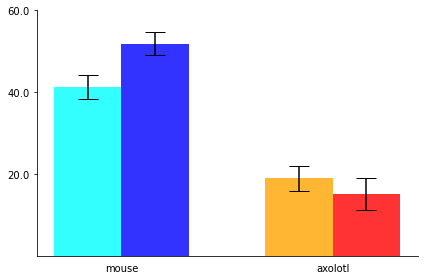

In [275]:
ln_means=[mouse_lstaspred_couples[:,0].mean()+0.01,salam_lstaspred_couples[:,0].mean()]
cnn_means=[mouse_lstaspred_couples[:,1].mean(),salam_lstaspred_couples[:,1].mean()]

ln_errs=[mouse_lstaspred_couples[:,0].std()/np.sqrt(len(mouse_lstaspred_couples[:,0])),salam_lstaspred_couples[:,0].std()/np.sqrt(len(salam_lstaspred_couples[:,0]))]
cnn_errs=[mouse_lstaspred_couples[:,1].std()/np.sqrt(len(mouse_lstaspred_couples[:,1])),salam_lstaspred_couples[:,1].std()/np.sqrt(len(salam_lstaspred_couples[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, ln_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=ln_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_2Ea.pdf',format='pdf')
plt.show()

# Figure 3 E

In [80]:
#quantification of how many inverting cells lost their ON LSTAs when perfused with LAP4

stayed_ON=0
stayed_OFF=0
lstas_ON=0
lstas_OFF=0

for exp in [14,19]:
    if exp==14:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_14/analysis/exp_LSTAS_labels_berens_exp14.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_14/analysis/exp_LAP4_LSTAS_labels_berens_exp14.npy',allow_pickle=True)
        inverting_cells_list=[153, 341, 351, 720]
    if exp==17:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LAP4_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        inverting_cells_list=[4, 30, 113, 116, 339, 349, 364, 567, 706, 754, 862, 874, 892, 910, 956, 962, 991, 1004, 1031]
    if exp==19:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LAP4_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        inverting_cells_list=[153, 174, 237]
        
        
    for n, inv_cell in enumerate(inverting_cells_list):
        wt_idx=np.where(wt_labels[:,0]==inv_cell)[0][0]
        lap4_idx=np.where(lap4_labels[:,0]==inv_cell)[0][0]
        
        wt_labs=wt_labels[wt_idx,1]
        lap4_labs=lap4_labels[lap4_idx,1]
        print(wt_labs,lap4_labs)
        if np.abs(lap4_labs).sum()==0.:continue
        else:
            for img_nb,label in enumerate(wt_labs):
                if label==0.: continue
                elif label==1.:
                    if lap4_labs[img_nb]==1.: 
                        stayed_ON+=1
                        lstas_ON+=1
                    else:
                        lstas_ON+=1
                        continue
                else: 
                    if lap4_labs[img_nb]==-1.: 
                        stayed_OFF+=1
                        lstas_OFF+=1
                    else:
                        lstas_OFF+=1
                        continue
                    
                    
print(stayed_ON/lstas_ON,stayed_OFF/lstas_OFF)
print(stayed_ON, lstas_ON, stayed_OFF, lstas_OFF)

[-1.  0.  0. -1. -1. -1. -1.  1.] [ 0.  1. -1. -1.  0.  0.  0. -1.]
[-1.  0.  0.  0. -1.  1. -1.  0.] [-1.  0.  0.  0.  0. -1.  0.  1.]
[ 1.  0.  0.  0.  1.  0. -1. -1.] [ 1.  0.  0.  0.  0.  0. -1. -1.]
[-1.  1.  0.  1. -1. -1. -1.  0.] [-1.  0.  0.  0.  0. -1. -1.  0.]
[ 1.  0.  0.  0.  0.  0.  0. -1.] [ 0.  0.  0.  1. -1.  0.  0. -1.]
[ 0.  1.  0.  0.  0.  0.  0. -1.] [0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  1.  0.  0.  0.  0.  0.  1.] [-1.  0.  0.  0.  0.  0.  0.  0.]
0.1111111111111111 0.5625
1 9 9 16


In [82]:
# same as above but without excluding the dead cells
stayed_ON=0
stayed_OFF=0
lstas_ON=0
lstas_OFF=0

for exp in [14,17,19]:
    if exp==14:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_14/analysis/exp_LSTAS_labels_berens_exp14.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_14/analysis/exp_LAP4_LSTAS_labels_berens_exp14.npy',allow_pickle=True)
        inverting_cells_list=[153, 341, 351, 720]
    if exp==17:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_17/analysis/exp_LAP4_LSTAS_labels_berens_exp17.npy',allow_pickle=True)
        inverting_cells_list=[4, 30, 113, 116, 339, 349, 364, 567, 706, 754, 862, 874, 892, 910, 956, 962, 991, 1004, 1031]
    if exp==19:
        wt_labels=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        lap4_labels=np.load('/media/samuele/Samuele_01/Exp_19/analysis/exp_LAP4_LSTAS_labels_berens_exp19.npy',allow_pickle=True)
        inverting_cells_list=[153, 174, 237]
        
        
    for n, inv_cell in enumerate(inverting_cells_list):
        wt_idx=np.where(wt_labels[:,0]==inv_cell)[0][0]
        lap4_idx=np.where(lap4_labels[:,0]==inv_cell)[0][0]
        
        wt_labs=wt_labels[wt_idx,1]
        lap4_labs=lap4_labels[lap4_idx,1]
        print(wt_labs,lap4_labs)

        for img_nb,label in enumerate(wt_labs):
            if label==0.: continue
            elif label==1.:
                if lap4_labs[img_nb]==1.: 
                    stayed_ON+=1
                    lstas_ON+=1
                else:
                    lstas_ON+=1
                    continue
            else: 
                if lap4_labs[img_nb]==-1.: 
                    stayed_OFF+=1
                    lstas_OFF+=1
                else:
                    lstas_OFF+=1
                    continue
                    
                    
print(stayed_ON/lstas_ON,stayed_OFF/lstas_OFF)
print(stayed_ON, lstas_ON, stayed_OFF, lstas_OFF)

[-1.  0.  0. -1. -1. -1. -1.  1.] [ 0.  1. -1. -1.  0.  0.  0. -1.]
[-1.  0.  0.  0. -1.  1. -1.  0.] [-1.  0.  0.  0.  0. -1.  0.  1.]
[ 1.  0.  0.  0.  1.  0. -1. -1.] [ 1.  0.  0.  0.  0.  0. -1. -1.]
[-1.  1.  0.  1. -1. -1. -1.  0.] [-1.  0.  0.  0.  0. -1. -1.  0.]
[ 0.  1.  0. -1.  0.  0.  0.  0.] [0. 0. 0. 1. 0. 0. 0. 0.]
[-1.  0.  1.  1.  0.  0.  0.  0.] [0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  0.  1. -1.  0.  0.  1.  0.] [0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  1.  0. -1.  0. -1. -1. -1.] [ 0.  0.  0.  0.  0.  0.  0. -1.]
[-1.  1. -1.  0. -1. -1. -1. -1.] [0. 0. 0. 1. 0. 0. 0. 0.]
[ 0. -1.  1.  1.  0.  0.  0.  0.] [0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  1.  0.  1. -1. -1. -1. -1.] [0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  1. -1. -1.  0.  0.  0.  0.] [0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  1.  1.  1.  1. -1. -1.  1.] [-1.  0.  0.  0.  0.  0. -1.  0.]
[-1.  1.  0.  1.  1.  1. -1. -1.] [0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  1.  0.  0. -1.  1. -1. -1.] [-1.  0.  0.  0. -1.  0. -1. -1.]
[-1.  1.  0.  0.  0. -1.  0. -1.] [0. 0. 0. 

/tmp/ipykernel_383131/3236185079.py:28: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_xticklabels( '','' )  #[labels[0],labels[1]])


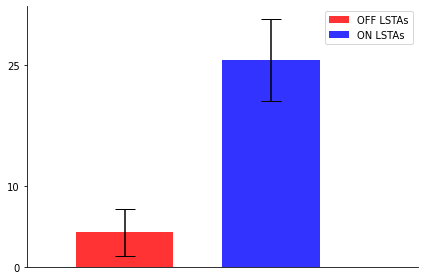

In [15]:
#Plotting of the quantification in the previous cell 

labels = ['% of OFF LSTAs after LAP4', '% of ON LSTAs after LAP4']
off_remaining = [19/74]
on_remaining = [2/47]

#sqrt(Np(1-p))
off_err=[np.sqrt( 74*19/74*(1-19/74) )/74]
on_err=[np.sqrt( 47*2/47*(1-2/47) )/47]

x = np.arange(len(labels)+1)*.5 # the label locations

width = 0.1  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(0.35 - 0.05, on_remaining, width, alpha=opacity, label='OFF LSTAs', color='red',yerr=on_err,capsize=10)
rects2 = ax.bar(0.35 + 0.1, off_remaining, width, alpha=opacity,label="ON LSTAs",color='blue', yerr=off_err, capsize=10)

# hbars = ax.barh(x, performance, xerr=error, align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks([0.2,0.6])
ax.set_xticklabels( '','' )  #[labels[0],labels[1]])
#plt.xlabel(labels[0])
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([0,.1,.25])
ax.set_yticks(yticks)
ax.set_yticklabels((yticks*100).astype(int))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.legend(loc='upper right')
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/Panel_3E.pdf',format='pdf')
plt.show()

In [13]:
print(off_remaining,off_err, on_remaining,on_err)

[0.25675675675675674] [0.05078208939110116] [0.0425531914893617] [0.029442485362623994]


# Figure 4G

In [13]:
# quantification of the performnce of the CNN vs Contrast model for the population of inverting cells selected by eye

# mouse_expl_var=np.load('/home/samuele/Data_analysis/CNNvsContrast_performance_mouse_invertingcellsselectedbyeye_correct.npy')
# salam_expl_var=np.load('/home/samuele/Data_analysis/CNNvsContrast_performance_salamander_invertingcellsselectedbyeye_correct.npy')

# cnn_means=[mouse_expl_var[:,0].mean(),salam_expl_var[:,0].mean()]
# contrast_means=[mouse_expl_var[:,1].mean(),salam_expl_var[:,1].mean()]

# cnn_errs=[mouse_expl_var[:,0].std()/np.sqrt(len(mouse_expl_var[:,0])),salam_expl_var[:,0].std()/np.sqrt(len(salam_expl_var[:,0]))]
# contrast_errs=[mouse_expl_var[:,1].std()/np.sqrt(len(mouse_expl_var[:,1])),salam_expl_var[:,1].std()/np.sqrt(len(salam_expl_var[:,1]))]


# labels = ['mouse', 'axolotl']

# x = np.arange(len(labels))*0.25  # the label locations

# width = 0.08  # the width of the bars

# fig, ax = plt.subplots()

# opacity = 0.8

# rects1 = ax.bar(x - width/2, contrast_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=contrast_errs, capsize=10)
# rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # # hbars = ax.barh(x, performance, xerr=error, align='center')

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('R^2 of Contrast vs CNN')
# # #ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# yticks=np.array([.2,.4,.6,.8,1.0])
# ax.set_yticks(yticks)
# ax.set_yticklabels(yticks*100)

# #ax.legend(loc='upper left')

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# #ax.spines['bottom'].set_visible(False)
# #ax.spines['left'].set_visible(False)

# #ax.bar_label(rects1, padding=3)
# #ax.bar_label(rects2, padding=3)
# #plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

# fig.tight_layout()
# #fig.savefig('/home/samuele/Data_analysis/Figures/Panel_4G.pdf',format='pdf')
# plt.show()


### p-value of the fact that the Contrast model is worse than CNN in predicting test PSTHs

In [66]:
w, p_mouse = wilcoxon(mouse_expl_var[:,0], mouse_expl_var[:,1])
w, p_salam = wilcoxon(salam_expl_var[:,0], salam_expl_var[:,1])

print(p_mouse, p_salam)

0.0003403219506981793 0.0078125


In [2]:
#here I load the performance of the CNN and the contrast model for each inverting cell. I also load as a third 
#column the percentage of the CNN variance in the response that the contrast model can predict.

mouse_expl_var_berens=np.load('/home/samuele/Data_analysis/CNNvsContrast_performance_mouse_invertingcellsBerens_correct.npy')
salam_expl_var_berens=np.load('/home/samuele/Data_analysis/CNNvsContrast_performance_salamander_invertingcellsBerens_correct.npy')

In [76]:
#not useful
import random
reduced_mouse_expl_var=np.array(random.choices(mouse_expl_var, k=14))
reduced_salam_expl_var=np.array(random.choices(salam_expl_var, k=6))

w, p_mouse_contrast = wilcoxon(reduced_mouse_expl_var[:,0], mouse_expl_var_berens[:,0])
w, p_salam_contrast = wilcoxon(reduced_salam_expl_var[:,0], salam_expl_var_berens[:,0])
w, p_mouse_cnn = wilcoxon(reduced_mouse_expl_var[:,0], mouse_expl_var_berens[:,1])
w, p_salam_cnn = wilcoxon(reduced_salam_expl_var[:,0], salam_expl_var_berens[:,1])

print(p_mouse_contrast,p_salam_contrast,p_mouse_cnn,p_salam_cnn)

0.421578895217645 0.892738400944348 0.5015869140625 0.0625


/home/samuele/anaconda3/envs/RFEst/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/samuele/anaconda3/envs/RFEst/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


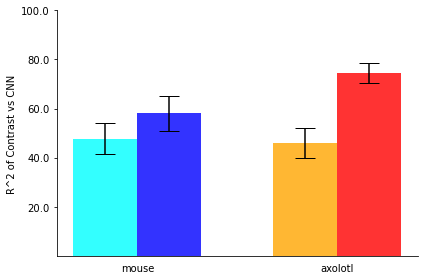

In [4]:
cnn_means=[mouse_expl_var_berens[:,0].mean(),salam_expl_var_berens[:,0].mean()]
contrast_means=[mouse_expl_var_berens[:,1].mean(),salam_expl_var_berens[:,1].mean()]

cnn_errs=[mouse_expl_var_berens[:,0].std()/np.sqrt(len(mouse_expl_var_berens[:,0])),salam_expl_var_berens[:,0].std()/np.sqrt(len(salam_expl_var_berens[:,0]))]
contrast_errs=[mouse_expl_var_berens[:,1].std()/np.sqrt(len(mouse_expl_var_berens[:,1])),salam_expl_var_berens[:,1].std()/np.sqrt(len(salam_expl_var_berens[:,1]))]


labels = ['mouse', 'axolotl']

x = np.arange(len(labels))*0.25  # the label locations

width = 0.08  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(x - width/2, contrast_means, width, alpha=opacity, label='mouse', color=['cyan','orange'],yerr=contrast_errs, capsize=10)
rects2 = ax.bar(x + width/2, cnn_means, width, alpha=opacity,label='axolotl',color=['blue','red'], yerr=cnn_errs, capsize=10)

# # hbars = ax.barh(x, performance, xerr=error, align='center')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R^2 of Contrast vs CNN')
# #ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
yticks=np.array([.2,.4,.6,.8,1.0])
ax.set_yticks(yticks)
ax.set_yticklabels(yticks*100)

#ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
#fig.savefig('/home/samuele/Data_analysis/Figures/Panel_4G_20cells.pdf',format='pdf')


plt.show()

In [20]:
w, p_mouse = wilcoxon(mouse_expl_var_berens[:,0], mouse_expl_var_berens[:,1])
w, p_salam = wilcoxon(salam_expl_var_berens[:,0], salam_expl_var_berens[:,1])

print(p_mouse, p_salam)

0.013427734375 0.015625


In [5]:
print(cnn_means,cnn_errs)
print(contrast_means, contrast_errs)

[0.5805166639172986, 0.7456907022188375] [0.07113265548472865, 0.03959649841590381]
[0.4773597671492685, 0.45958050344548784] [0.0641964004318379, 0.06085611087007997]


In [21]:
# percentage of the variance in the CNN predictions that the contrast model reproduces

print(mouse_expl_var_berens[:,2].mean(),
salam_expl_var_berens[:,2].mean())

0.7896892250101464 0.776091157674433


## New panel 4G

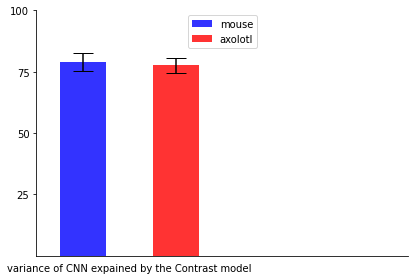

In [11]:
#variance of the CNN explained by the Contrast model

mouse_mean=mouse_expl_var_berens[:,2].mean()
salamander_mean=salam_expl_var_berens[:,2].mean()

mouse_error=mouse_expl_var_berens[:,2].std()/np.sqrt(mouse_expl_var_berens[:,2].size)
salamander_error=salam_expl_var_berens[:,2].std()/np.sqrt(salam_expl_var_berens[:,2].size)


labels = ['variance of CNN expained by the Contrast model']
mouse = [mouse_mean]
salamander = [salamander_mean]
y_err_m=np.array([mouse_error])
y_err_s=np.array([salamander_error])

x = np.arange(len(labels)+1)*.5 # the label locations

width = 0.1  # the width of the bars

fig, ax = plt.subplots()

opacity = 0.8

rects1 = ax.bar(0.2 - 0.1, mouse, width, alpha=opacity, label='mouse', color='blue',yerr=y_err_m,capsize=10)
rects2 = ax.bar(0.2 + 0.1, salamander, width, alpha=opacity,label='axolotl',color='red', yerr=y_err_s, capsize=10)

# hbars = ax.barh(x, performance, xerr=error, align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks([0,0.2,0.8])
ax.set_xticklabels(['',labels[0],''])
#plt.xlabel(labels[0])
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

yticks=np.array([.25,.5,.75,1.])
ax.set_yticks(yticks)
ax.set_yticklabels((yticks*100).astype(int))
ax.legend(loc='upper center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#plt.axhline(y=0.2, linestyle='--', alpha=0.5, color='k', label='0')

fig.tight_layout()
fig.savefig('/home/samuele/Data_analysis/Figures/New_Panel_4G.pdf',format='pdf')
plt.show()

## Quick and dirty code to see with what significance the Contrast model outpeforms the LN in predicting the responses of inverting cells

In [21]:
# run the cell to obtain figure 2Ba and load the contrast model performance before running this.

print(mouse_exp_couples.shape, salam_exp_couples.shape )
print(mouse_expl_var_berens.shape,salam_expl_var_berens.shape)

mouse_LNvsContrast_perf=[]
for triplet in mouse_expl_var_berens:
    cnn_perf=triplet[0]  #for an inverting cell, I take the CNN performance
    if list(np.where(mouse_exp_couples[:,1]==cnn_perf)[0]):
        idx=np.where(mouse_exp_couples[:,1]==cnn_perf)[0][0]  #I go look which index that cell is in the LNvs CNN performance list
        ln_perf=mouse_exp_couples[idx,0]  #I take the performance of the LN in that cell
        mouse_LNvsContrast_perf.append([ln_perf, triplet[1]])
        
mouse_LNvsContrast_perf=np.array(mouse_LNvsContrast_perf)

salam_LNvsContrast_perf=[]
for triplet in salam_expl_var_berens:
    cnn_perf=triplet[0]  #for an inverting cell, I take the CNN performance
    if list(np.where(salam_exp_couples[:,1]==cnn_perf)[0]):
        idx=np.where(salam_exp_couples[:,1]==cnn_perf)[0][0]  #I go look which index that cell is in the LNvs CNN performance list
        ln_perf=salam_exp_couples[idx,0]  #I take the performance of the LN in that cell
        salam_LNvsContrast_perf.append([ln_perf, triplet[1]])
        
salam_LNvsContrast_perf=np.array(salam_LNvsContrast_perf)


w, p_mouse = wilcoxon(mouse_LNvsContrast_perf[:,0], mouse_LNvsContrast_perf[:,1])
w, p_salam = wilcoxon(salam_LNvsContrast_perf[:,0], salam_LNvsContrast_perf[:,1])

print(p_mouse, p_salam)

(78, 2) (49, 2)
(14, 3) (7, 3)
0.00048828125 0.03125


array([[1.18610924e-01, 4.56085294e-01],
       [7.20878237e-01, 7.85066033e-01],
       [9.13390664e-01, 9.64370095e-01],
       [2.87656235e-04, 3.91357346e-01],
       [2.51073391e-02, 3.46818028e-01],
       [3.53721370e-02, 3.00319907e-01],
       [2.03598458e-01, 3.65505229e-01],
       [2.67084515e-01, 4.03626804e-01],
       [3.18032790e-01, 4.04160233e-01],
       [4.62904922e-01, 8.40255185e-01],
       [1.44553386e-02, 5.86258595e-01],
       [1.45585181e-02, 4.97257280e-02]])

# Figure 3 B

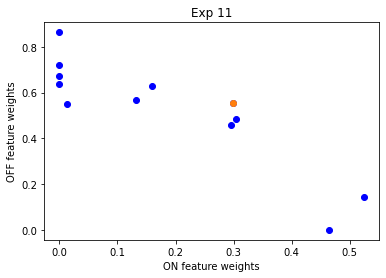

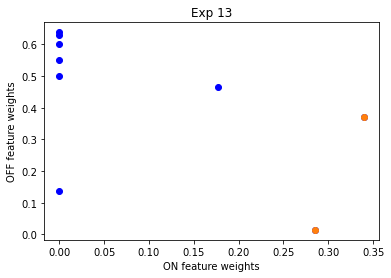

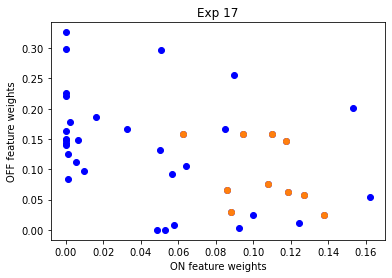

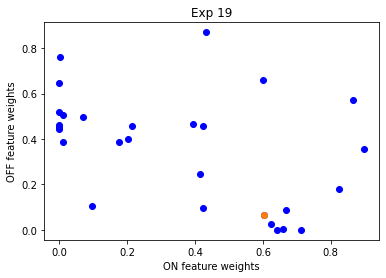

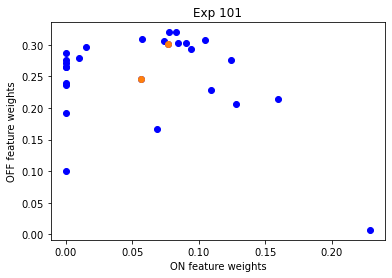

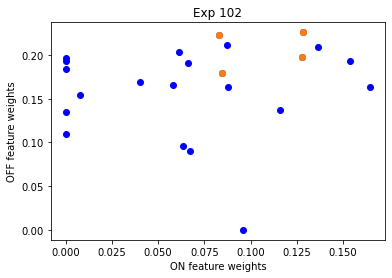

In [39]:
#visualization of the feature weights
#(to run this cell the feature weights have to be saved in a numpy array by running baseline_cnn_analize.py of each experiment)

#the cells chosen to be inverting are the ones modelled and predicted by the berens

for exp in [11,13,17,19,101,102]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())
    ON_coord=np.array(ON_coord)
    OFF_coord=np.array(OFF_coord)
    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])
    plt.figure()
    plt.scatter(ON_coord, OFF_coord,color='blue')
    plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1')
    plt.xlabel('ON feature weights')
    plt.ylabel('OFF feature weights')
    plt.title('Exp {0}'.format(exp))
        
        

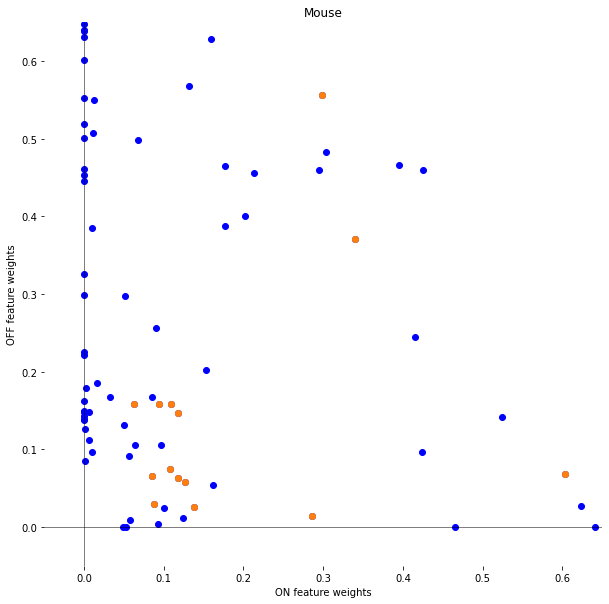

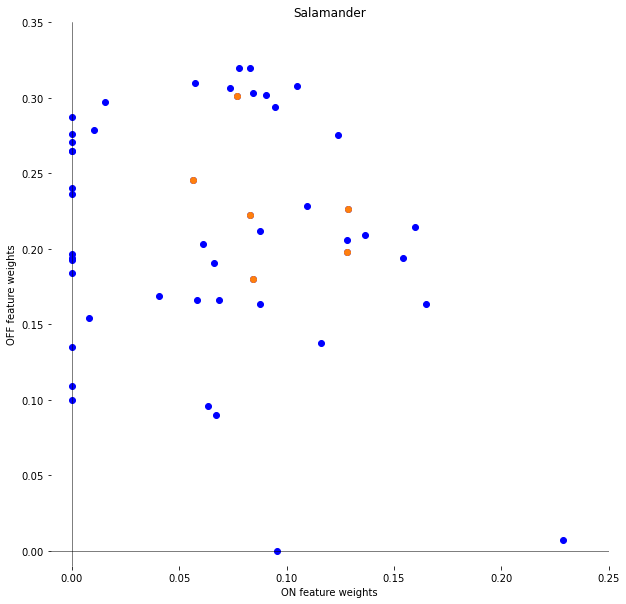

In [40]:
# same but animalwise
plt.figure(figsize=(10,10))
plt.axes(frameon=False)
for exp in [11,13,17,19]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])

    ON_coord=np.array(ON_coord)
    OFF_coord=np.array(OFF_coord)

    plt.scatter(ON_coord, OFF_coord,color='blue')
    plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1')
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('Mouse'.format(exp))
plt.xlim([-0.05,0.65])
plt.ylim([-0.05,0.65])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)
        
plt.figure(figsize=(10,10))
plt.axes(frameon=False)

for exp in [101,102]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])

    ON_coord=np.array(ON_coord)
    OFF_coord=np.array(OFF_coord)

    plt.scatter(ON_coord, OFF_coord,color='blue')
    plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1')
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('Salamander'.format(exp))
plt.xlim([-0.01,0.25])
plt.ylim([-0.01,0.35])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)       

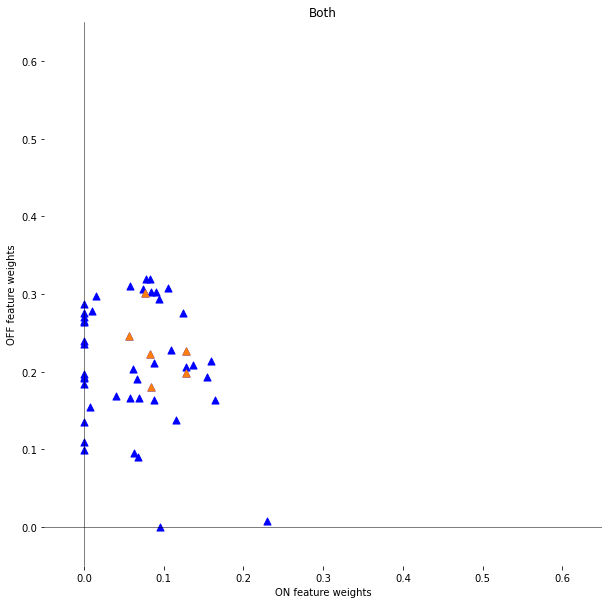

In [27]:
#same but both animals together
plt.figure(figsize=(10,10))
plt.axes(frameon=False)
for exp in [11,13,17,19,101,102]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])
    ms = 50
    ON_coord=np.array(ON_coord)
    OFF_coord=np.array(OFF_coord)
    if exp>100:
        plt.scatter(ON_coord, OFF_coord,color='blue', marker="^",s=ms)
        plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1', marker="^",s=ms)
    else:
        plt.scatter(ON_coord, OFF_coord,color='blue',s=ms)
        plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1',s=ms)
    
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('Both'.format(exp))
plt.xlim([-0.05,0.65])
plt.ylim([-0.05,0.65])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)


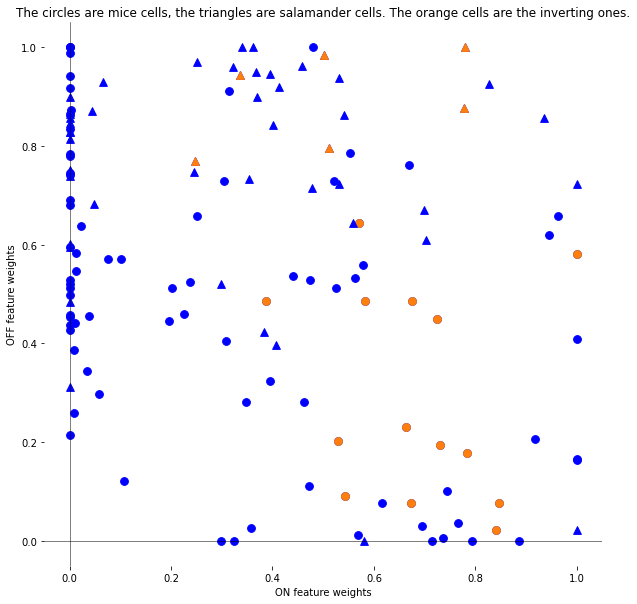

In [53]:
#here I do both animals together with a rescaling to make the weights comparable. I rescale by the maximum weight
plt.figure(figsize=(10,10))
plt.axes(frameon=False)
for exp in [11,13,17,19,101,102]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])
    ms = 60
    ON_coord=np.array(ON_coord)/np.array(ON_coord).max()
    OFF_coord=np.array(OFF_coord)/np.array(OFF_coord).max()
    if exp>100:
        plt.scatter(ON_coord, OFF_coord,color='blue', marker="^",s=ms)
        plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1', marker="^",s=ms)
    else:
        plt.scatter(ON_coord, OFF_coord,color='blue',s=ms)
        plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='C1',s=ms)
    
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('The circles are mice cells, the triangles are salamander cells. The orange cells are the inverting ones.'.format(exp))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05, 1.05])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)
plt.savefig('/home/samuele/Data_analysis/Figures/Panel_3B_bothanimals.pdf',format='pdf')


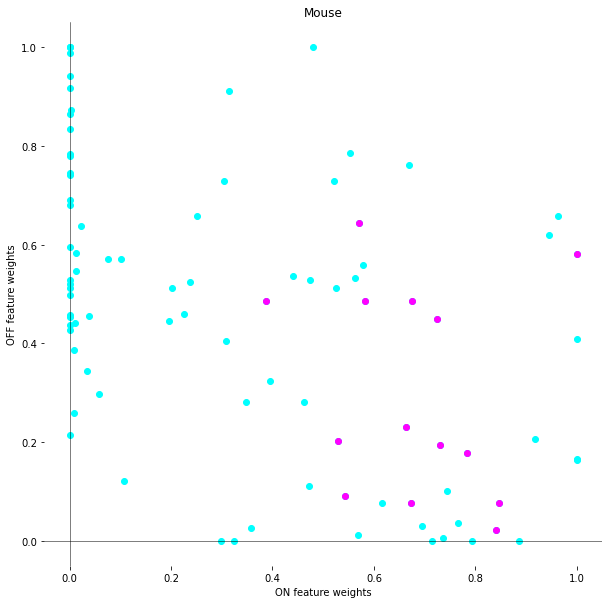

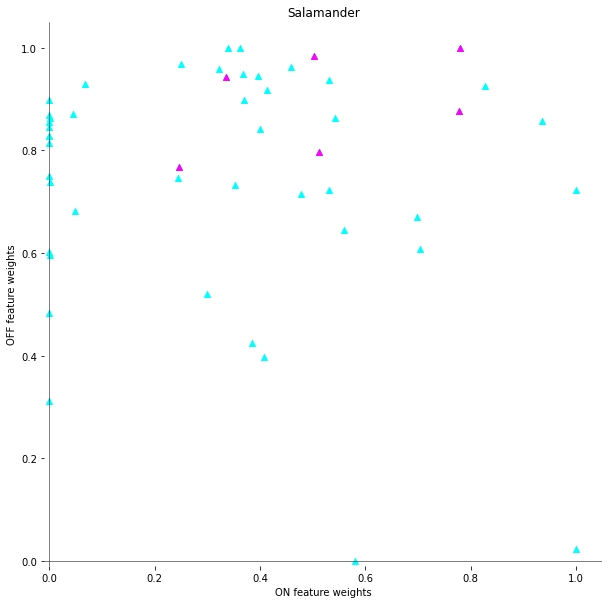

In [259]:
# this is animalwise with the rescaling
plt.figure(figsize=(10,10))
plt.axes(frameon=False)
for exp in [11,13,17,19]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])

    ON_coord=np.array(ON_coord)/np.array(ON_coord).max()
    OFF_coord=np.array(OFF_coord)/np.array(OFF_coord).max()

    plt.scatter(ON_coord, OFF_coord,color='cyan')
    plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='magenta')
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('Mouse'.format(exp))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)
plt.savefig('/home/samuele/Data_analysis/Figures/Panel_3B_mouse.pdf',format='pdf')

plt.figure(figsize=(10,10))
plt.axes(frameon=False)
for exp in [101,102]:
    
    if exp==11: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_11/analysis/cnn_12mixed_tr19/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[2] #68
        ON_kernels=np.array([0,0,1,0])
    if exp==13: 
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_13/analysis/cnn_9OFF_tr1/plots/run_097/feature_weights.npy')
        inverting_cells_idx=np.array([1,6])  #186,634
        ON_kernels=np.array([0,0,1,0])
    if exp==17:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_17/analysis/cnn_41mixed_tr28_repeat/plots/run_026/feature_weights.npy')
        inverting_cells_idx=[1,5,10,21,26,28,29,31,32,39] #30,116,339,754,862,892,910,962,991,1031
        ON_kernels=np.array([0,1,0,0])
    if exp==19:
        feature_weights = np.load('/media/samuele/Samuele_01/Exp_19/analysis/cnn_28mixed_tr35/plots/run_019/feature_weights.npy')
        inverting_cells_idx=[12] #237
        ON_kernels=np.array([0,1,0,1])
    if exp==101:
        feature_weights = np.load('/media/samuele/BC_Samuele/20190523_goodone/analyses/cnn_sys_ident/20200616_025316/plots/run_075/feature_weights.npy')
        inverting_cells_idx=[5,11]
        ON_kernels=np.array([0,0,1,0])
    if exp==102:
        feature_weights = np.load('/media/samuele/Samuele_01/Salamander2/cnn_23mixed_tr34/plots/run_030/feature_weights.npy')
        inverting_cells_idx=[2,7,9,12]   #999,1029,1046,1055
        ON_kernels=np.array([0,0,1,0])
    
    ON_coord = [] 
    OFF_coord = []
    for cell_weights in feature_weights:
        ON_coord.append(cell_weights[np.where(ON_kernels==1)[0]].sum())
        OFF_coord.append(cell_weights[np.where(ON_kernels!=1)[0]].sum())

    #print(ON_coord)
#     print(ON_coord[inverting_cells_idx])

    ON_coord=np.array(ON_coord)/np.array(ON_coord).max()
    OFF_coord=np.array(OFF_coord)/np.array(OFF_coord).max()

    plt.scatter(ON_coord, OFF_coord,color='cyan',marker="^")
    plt.scatter(ON_coord[inverting_cells_idx], OFF_coord[inverting_cells_idx],color='magenta',marker="^")
plt.xlabel('ON feature weights')
plt.ylabel('OFF feature weights')
plt.title('Salamander'.format(exp))
plt.xlim([-0.01,1.05])
plt.ylim([-0.01,1.05])
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)     
plt.savefig('/home/samuele/Data_analysis/Figures/Panel_3B_salamander.pdf',format='pdf')